# sCREEN find trajectories 1 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
#from sklearn.cluster import DBSCAN
%matplotlib inline
%config InlineBackend.figure_format='retina'

from tqdm.notebook import tqdm


In [2]:
path_to_dataset = 'sCREEN-dataset.txt'
data = pd.read_csv(path_to_dataset)
data['time'] = pd.to_datetime(data['time'], format='%Y-%m-%d %H:%M:%S')
data

,id,tag_id,time,x,y,z
0,6135101,0x00205EFB1721,2016-07-30 23:55:00,13.58,29.24,0
1,5777232,0x00205EFB1243,2016-07-30 23:55:00,15.49,32.16,0
2,5916525,0x00205EFB1721,2016-07-30 23:54:58,13.55,29.23,0
3,5942875,0x00205EFB1243,2016-07-30 23:54:58,15.54,32.19,0
4,6109080,0x00205EFB1721,2016-07-30 23:54:58,13.53,29.18,0
...,...,...,...,...,...,...
4622434,1232830,0x00205EFE0F22,2016-07-01 03:43:43,15.71,31.74,0
4622435,1646429,0x00205EFE0F22,2016-07-01 03:43:42,15.73,31.41,0
4622436,1304749,0x00205EFE0FC7,2016-07-01 03:43:42,16.86,30.63,0
4622437,1343292,0x00205F0901E1,2016-07-01 03:43:42,15.44,32.56,0


In [3]:
tag_id = '0x00205EFB1721'
0x00205EFB1243    
sub_data = data.loc[data['tag_id'] == tag_id]

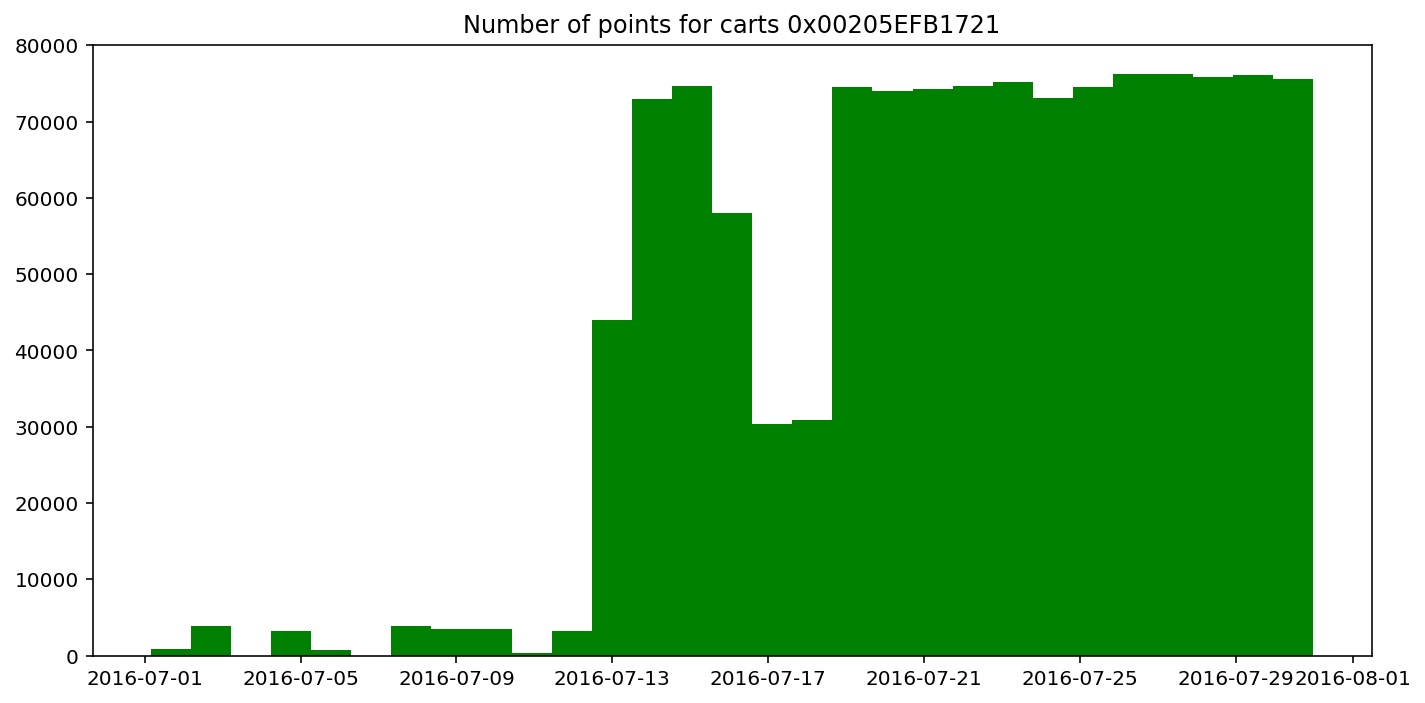

In [4]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(sub_data['time'], bins=29, facecolor='g')
ax.set(title=f'Number of points for carts {tag_id}')
fig.tight_layout()
plt.show()

In [5]:
# 3,6,10,31 è vuoto
# 2, 7, 4, 8-9(cluster), 11 traiettorie belle
# 12 traiettoria al limite con cluster
# 1,5,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30 traiettorie piccole e rumorose
# 23,24,25,26,27,28,29,30 hanno lo stesso pattern
day = datetime.date(2016,7,7)

In [4]:
#mask = (sub_data['time'].dt.hour >= 6) & (sub_data['time'].dt.hour <= 11) & (sub_data['time'].dt.date == day)
mask = (sub_data['time'].dt.hour >= 6) & (sub_data['time'].dt.hour <= 11)
sub_data2 = sub_data.loc[mask]
sub_data2 = sub_data2.sort_values('time').reset_index(drop=True)
len(sub_data2)

349975

In [8]:
sub_data2[0:20]

,id,tag_id,time,x,y,z
0,1561682,0x00205EFB1721,2016-07-01 06:04:47,15.72,32.42,0
1,1330481,0x00205EFB1721,2016-07-01 06:04:48,15.59,32.25,0
2,1343320,0x00205EFB1721,2016-07-01 06:04:49,15.31,32.03,0
3,1374141,0x00205EFB1721,2016-07-01 06:04:49,15.45,32.10,0
4,1484616,0x00205EFB1721,2016-07-01 06:04:51,15.34,31.77,0
5,1232859,0x00205EFB1721,2016-07-01 06:04:52,16.70,31.77,0
6,1273963,0x00205EFB1721,2016-07-01 06:13:28,15.94,31.70,0
7,1543705,0x00205EFB1721,2016-07-01 06:13:28,16.28,31.68,0
8,1384424,0x00205EFB1721,2016-07-01 06:25:12,15.69,31.80,0
9,1474347,0x00205EFB1721,2016-07-01 06:25:14,15.60,31.96,0


## 1° approach 
Data missing 

<p>Funcion <strong>Find_Trajectory</strong> </p>
ARGUMENT
    <ul><li>DataFrame with dataTime collum with name "time"</li></ul>
RETURN
    <ul><li> list of DataFrame; every cell is a trajectory</li></ul>

In [5]:
def find_trajectory(data):
    all_trajectories = []

    previous_time = data['time'].iloc[0]
    start = 0

    for idx, row in data.iterrows():
        current_time = row['time']
        time_delta = current_time - previous_time
        minutes_delta = time_delta.seconds//60%60
        #print(time_delta.seconds)
        if minutes_delta >= 5:
            end = idx - 1
            current_traj = data.iloc[start:end]
            all_trajectories.append(current_traj)
            start = idx

        previous_time = current_time
    all_trajectories.append(data.iloc[start:len(data)-1])
    return all_trajectories

In [8]:
trajectories = find_trajectory(sub_data2)
print("Number of trajectories:", len(trajectories))

Number of trajectories: 135


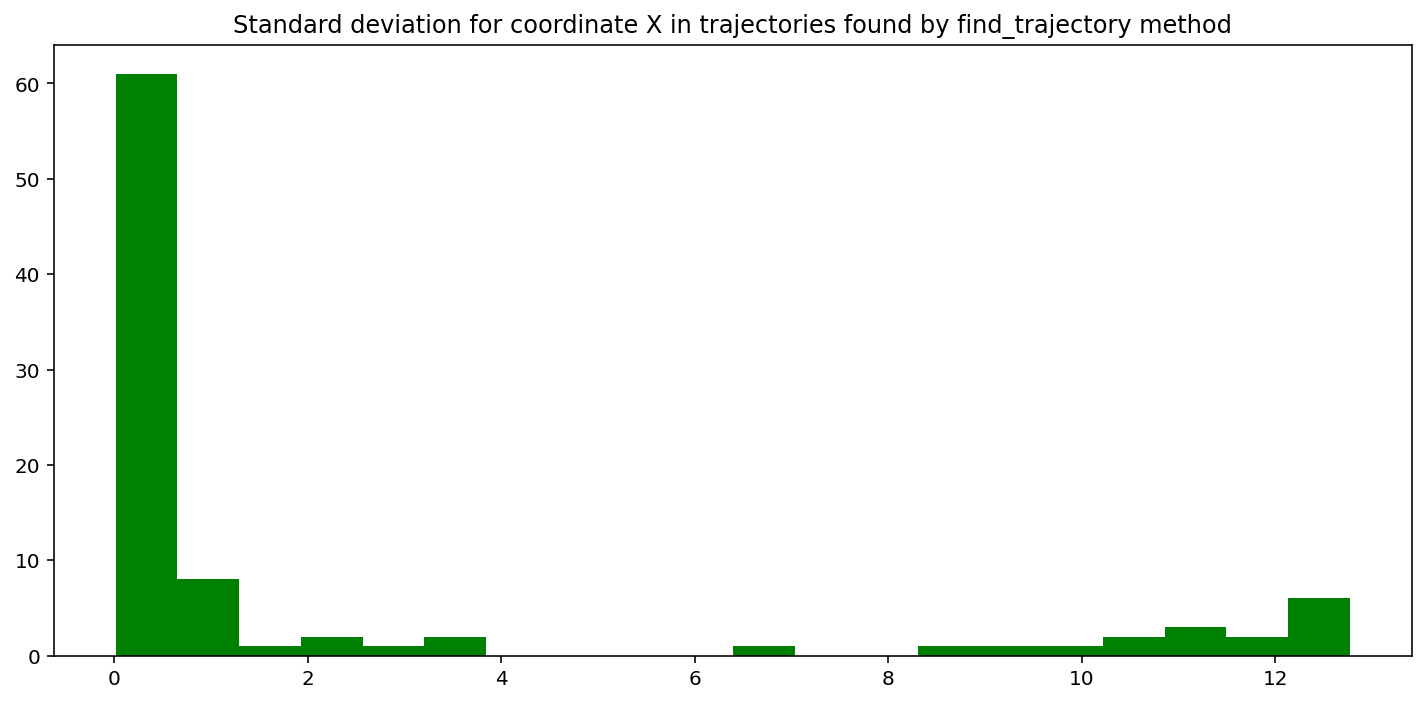

First three bins for X: [0.01290994 0.65083616 1.28876238]


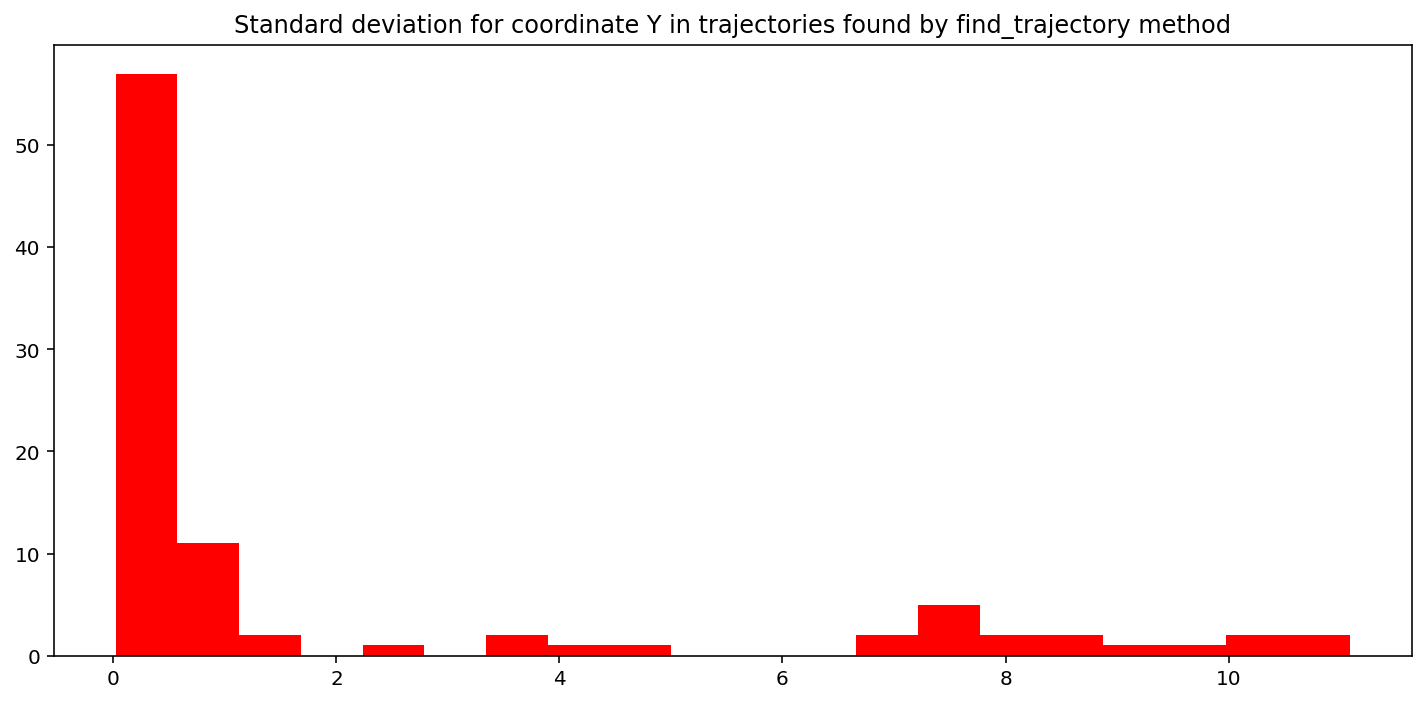

First three bins for Y: [0.0212132  0.57452857 1.12784393]


In [21]:
std_array_x = []
std_array_y = []
for idx, row in enumerate(trajectories):
    std_x = row["x"].std()
    std_y = row["y"].std()
    std_array_x.append(std_x)
    std_array_y.append(std_y)

data_tuples = list(zip(std_array_x,std_array_y))    
stds = pd.DataFrame(data_tuples, columns=['std_x', 'std_y'])

fig, ax = plt.subplots(figsize=(10,5))
ax.set(title="Standard deviation for coordinate X in trajectories found by find_trajectory method")
(n, bins, patches) = ax.hist(stds['std_x'], bins =20, facecolor='g')
fig.tight_layout()
plt.show()
print(f"First three bins for X: {bins[0:3]}")

fig, ax = plt.subplots(figsize=(10,5))
ax.set(title="Standard deviation for coordinate Y in trajectories found by find_trajectory method")
(n, bins, patches) = ax.hist(stds['std_y'],bins =20, facecolor='r')
fig.tight_layout()
plt.show()
print(f"First three bins for Y: {bins[0:3]}")

<p>Funcion <strong>Remove_cluster_point</strong> 
<p>Remove all the trajectories that have a Standard Deviation smaller than a Threshold</p>
ARGUMENT
    <ul>
    <li>List of DataFrame. Required two collums with names "x" and "y"</li>
    <li>Threshold. Integer/Float </li>
    </ul>
RETURN
    <ul><li>List of DataFrame; every cell is a trajectory</li></ul>

In [6]:
def remove_cluster_point(list_trajectories, threshold):
    trajectories = []
    for idx, row in enumerate(list_trajectories):
        std_x = row["x"].std()
        std_y = row["y"].std()
        if std_x > threshold and std_y > threshold:
            trajectories.append(row)
    return trajectories


In [12]:
clear_traj = remove_cluster_point(trajectories, 1)
print("Number of remaining trajectories:", len(clear_traj))

Number of remaining trajectories: 22


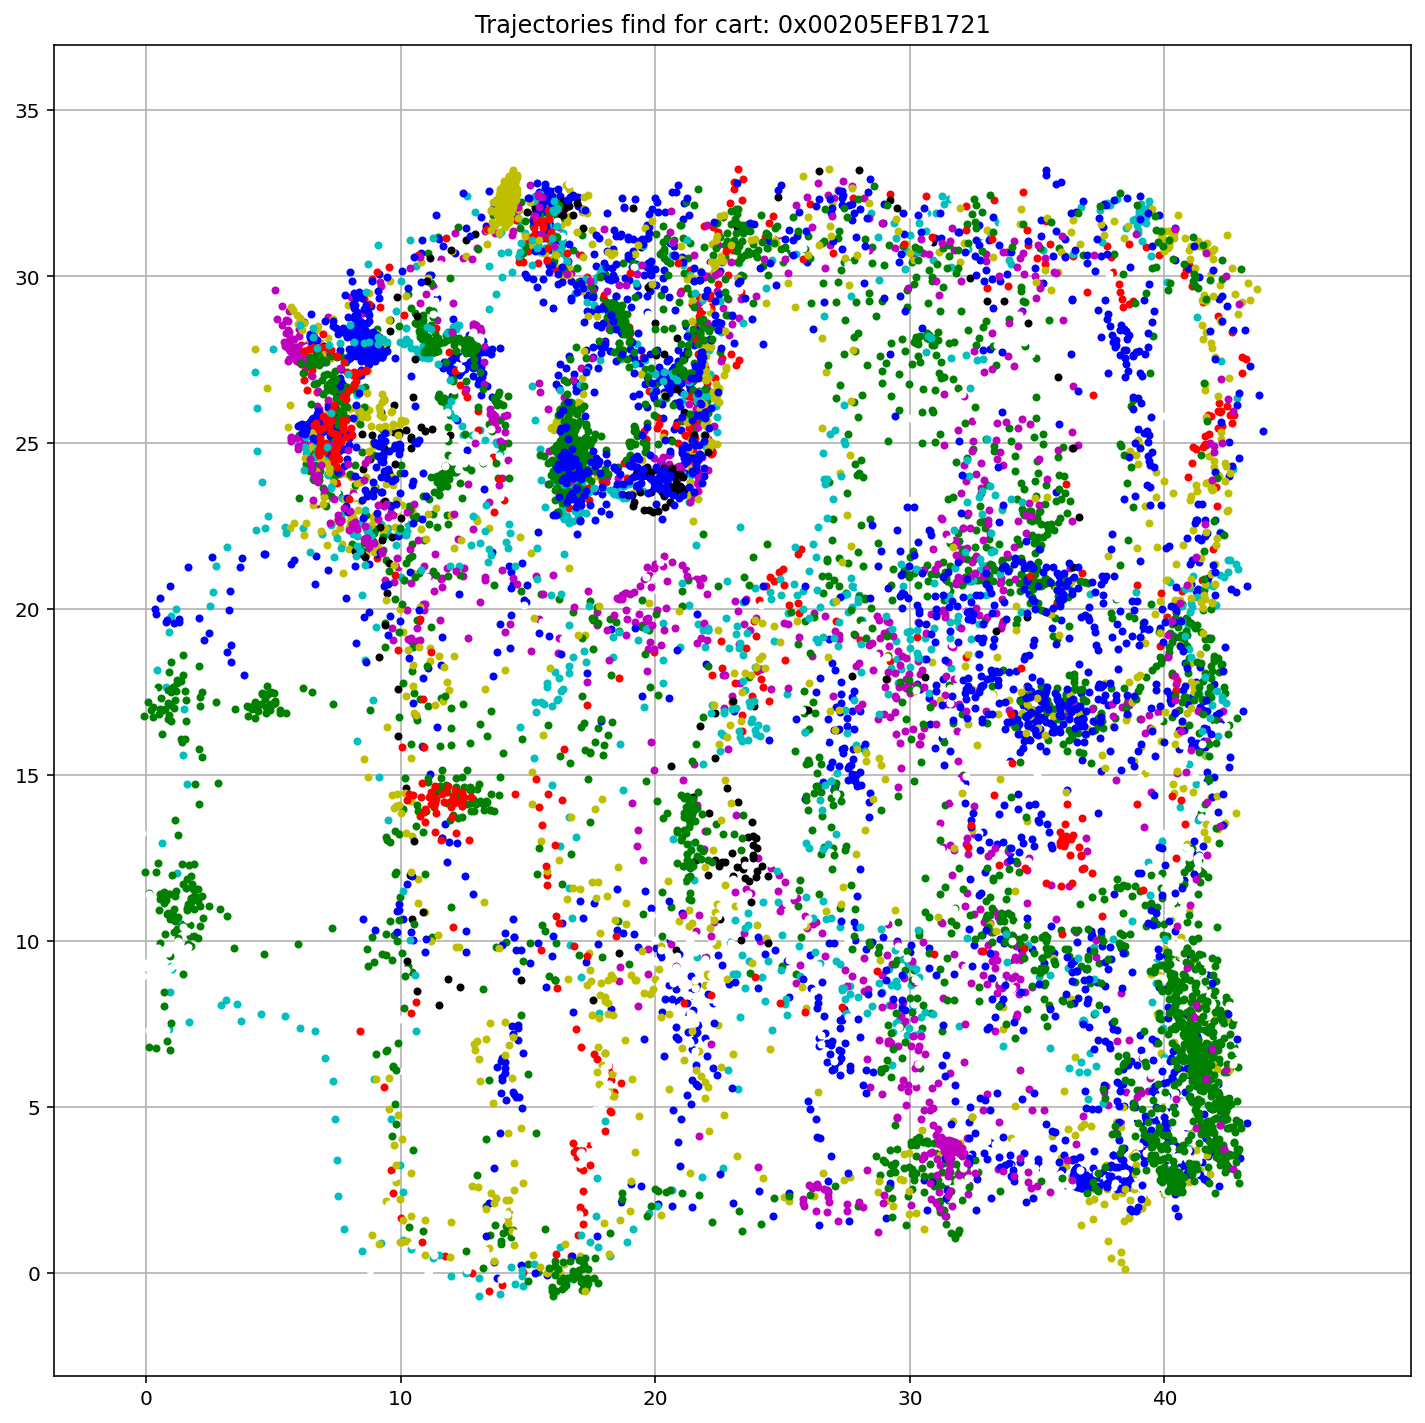

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set(title=f'Trajectories find for cart: {tag_id}')
ax.set_xlim(-3.63, 49.7)
ax.set_ylim(-3.08, 36.97)
ax.grid()
fig.tight_layout()

color = np.array(['b','g','r','c','m','y','k'])
c_idx = 0
for idx, traj in enumerate(clear_traj):
    y = traj['y'].values
    x = traj['x'].values
    ax.plot(x, y, f'.{color[c_idx]}')
    if c_idx == len(color)-1:
        c_idx = 0
    else:
        c_idx = c_idx+1

plt.show()

In [25]:
idx = 0

In [34]:
idx += 1
idx

#traiettorie strane => 10, 12,14,19,21

2

Trajectory 51
Start time: 2016-07-02 10:04:11
End time: 2016-07-02 10:37:36
Time delta: 0 days 00:33:25


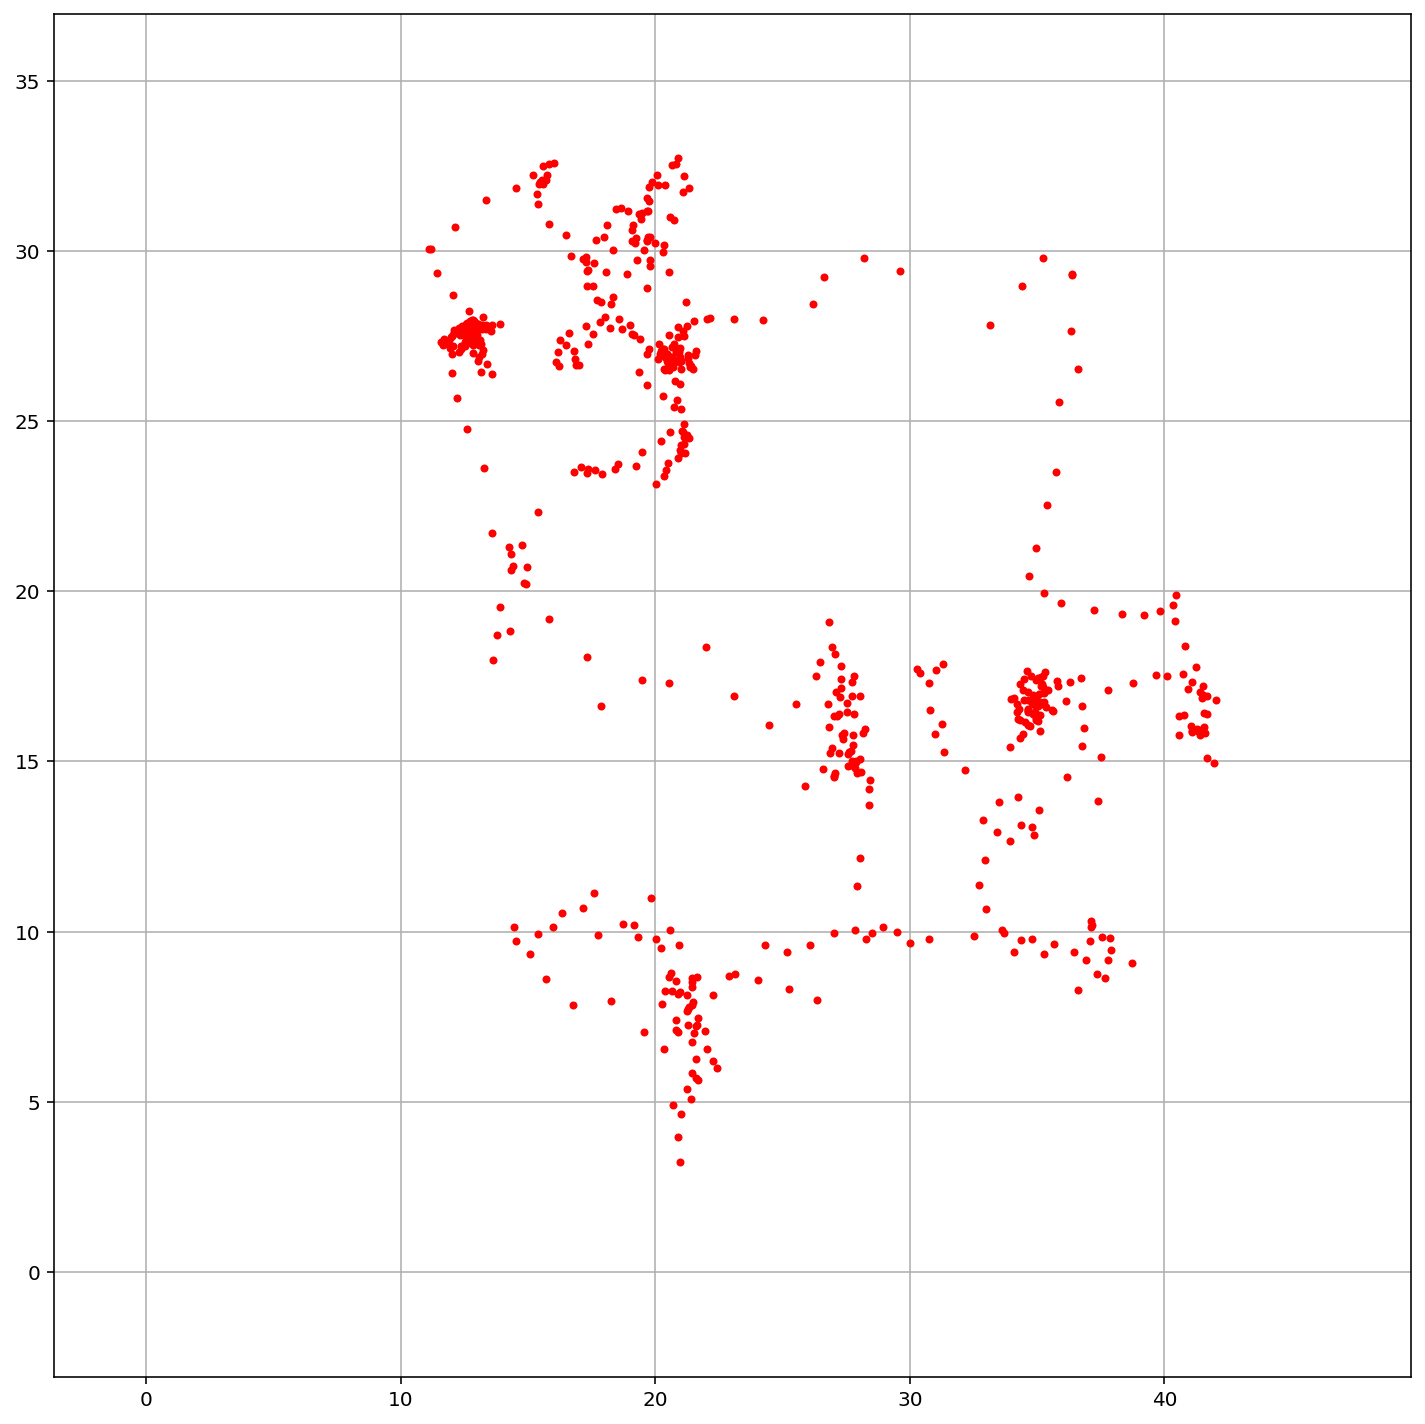

In [26]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(-3.63, 49.7)
ax.set_ylim(-3.08, 36.97)
ax.grid()
fig.tight_layout()

traj = clear_traj[idx]
print(f"Trajectory {51}")
print("Start time:", traj['time'].min())
print("End time:", traj['time'].max())
print("Time delta:", traj['time'].max() - traj['time'].min())
y = traj['y'].values
x = traj['x'].values
"""y = sub_data2['y'].values
x = sub_data2['x'].values"""
ax.plot(x, y, f'.r')
plt.show()

## 2° approach 
Euclidean distance

In [2]:
path_to_dataset = 'sCREEN-dataset.txt'
data = pd.read_csv(path_to_dataset)
data['time'] = pd.to_datetime(data['time'], format='%Y-%m-%d %H:%M:%S')
sub_data = data.loc[(data['tag_id'] == '0x00205EFB1721') |  (data['tag_id'] == '0x00205EFB1243')]

In [3]:
sub_data

,id,tag_id,time,x,y,z
0,6135101,0x00205EFB1721,2016-07-30 23:55:00,13.58,29.24,0
1,5777232,0x00205EFB1243,2016-07-30 23:55:00,15.49,32.16,0
2,5916525,0x00205EFB1721,2016-07-30 23:54:58,13.55,29.23,0
3,5942875,0x00205EFB1243,2016-07-30 23:54:58,15.54,32.19,0
4,6109080,0x00205EFB1721,2016-07-30 23:54:58,13.53,29.18,0
...,...,...,...,...,...,...
4622421,1422931,0x00205EFB1721,2016-07-01 04:18:47,15.65,32.40,0
4622423,1574502,0x00205EFB1721,2016-07-01 04:16:09,15.69,32.40,0
4622431,1366410,0x00205EFB1721,2016-07-01 04:16:08,15.76,32.48,0
4622432,1291903,0x00205EFB1721,2016-07-01 03:43:43,15.86,32.63,0


In [4]:
def euclidea (x1,y1,x2,y2):
    return pow((pow(x2-x1,2)+pow(y2-y1,2)),0.5)

In [5]:
distance_list = []
for i in range(0, len(sub_data)-1):
    row = sub_data.iloc[i]
    row_next = sub_data.iloc[i+1]
    distance = euclidea(row["x"], row["y"], row_next["x"], row_next["y"])
    distance_list.append(distance)

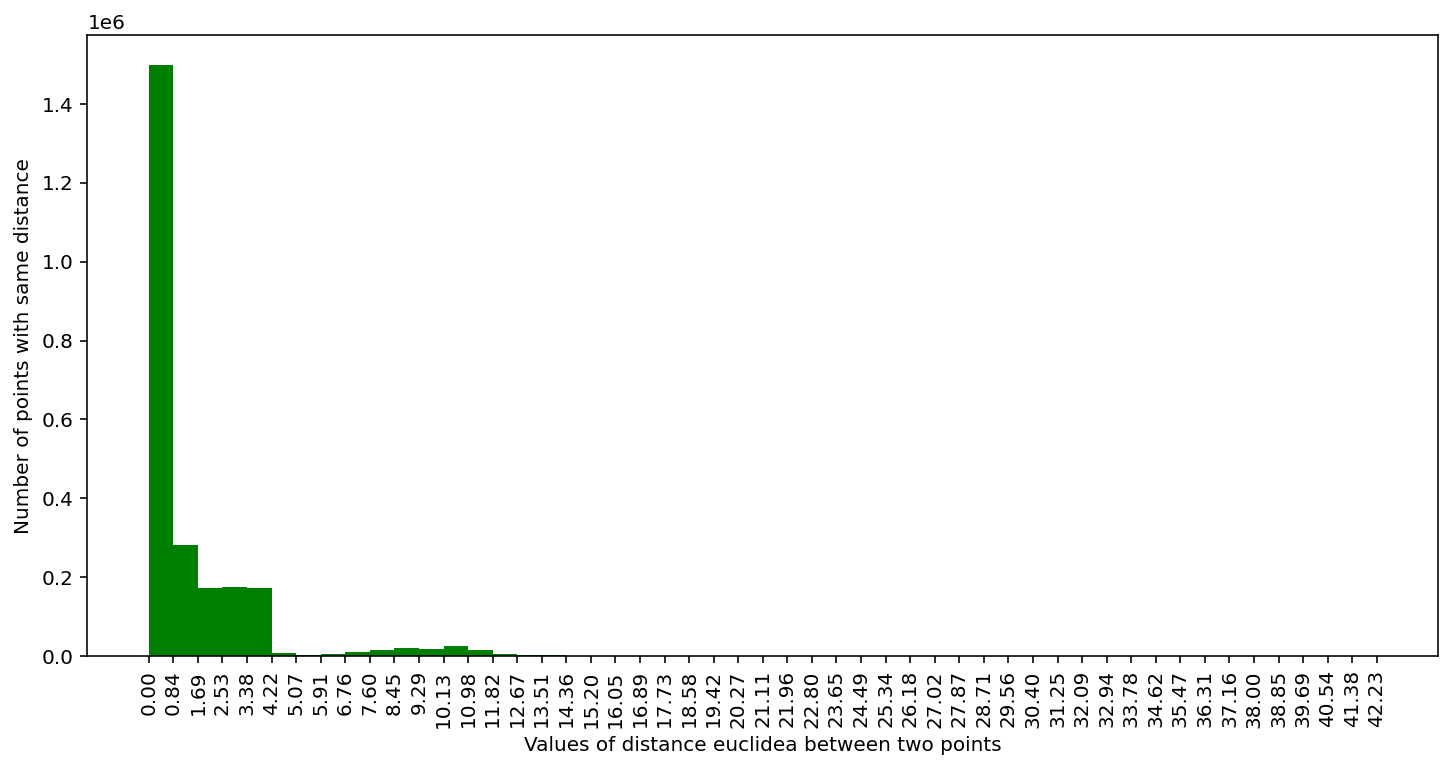

2442640
[ 0.          0.84450092  1.68900184  2.53350275  3.37800367  4.22250459
  5.06700551  5.91150642  6.75600734  7.60050826  8.44500918  9.28951009
 10.13401101 10.97851193 11.82301285 12.66751377 13.51201468 14.3565156
 15.20101652 16.04551744 16.89001835 17.73451927 18.57902019 19.42352111
 20.26802202 21.11252294 21.95702386 22.80152478 23.6460257  24.49052661
 25.33502753 26.17952845 27.02402937 27.86853028 28.7130312  29.55753212
 30.40203304 31.24653395 32.09103487 32.93553579 33.78003671 34.62453763
 35.46903854 36.31353946 37.15804038 38.0025413  38.84704221 39.69154313
 40.53604405 41.38054497 42.22504589]
[1.49927e+06 2.81204e+05 1.73167e+05 1.74106e+05 1.72912e+05 9.01400e+03
 2.28400e+03 5.02700e+03 9.89800e+03 1.52430e+04 1.94060e+04 1.75030e+04
 2.45680e+04 1.53680e+04 6.39900e+03 2.18500e+03 1.57500e+03 1.38100e+03
 4.10000e+02 2.76000e+02 4.15000e+02 3.77000e+02 2.98000e+02 3.25000e+02
 3.36000e+02 4.23000e+02 3.93000e+02 4.60000e+02 4.68000e+02 4.85000e+02
 4.090

In [6]:
fig, ax = plt.subplots(figsize=(10,5))
(n, bins, patches) =ax.hist(distance_list, facecolor='g', bins=50)
fig.tight_layout()
ax.set_xticks(bins)
plt.xticks(rotation=90)
ax.set_xlabel("Values of distance euclidea between two points")
ax.set_ylabel("Number of points with same distance")

plt.show()
print(len(distance_list))
print(bins)
print(n)

<p>Funcion <strong>find_trajectory_2</strong> 
<p>Find the trajectories withe the euclidean distance. One trajectory become two if the euclidean distance between two poi is more tha a Threshold</p>
ARGUMENT
    <ul>
    <li>List of DataFrame. Required two collums with names "x" and "y"</li>
    <li>Threshold. Integer/Float </li>
    </ul>
RETURN
    <ul>
        <li>Trajectories: list of DataFrame; every cell is a trajectory</li>
        <li>Waste: list of DataFrame; every cell is a wasted trajectory</li>
    </ul>

<p>NOTE: if two point have a euclidean distance less than a threshold but they have distance in time more that 5m this point are inside the same trajectory </p>

In [7]:
def find_trajectory_2(data, thrs):
    trajectories = []
    waste = []
    start = end = -1
    st = 0

    for i in range(0, len(data) - 1):
        row = data.iloc[i]
        row_next = data.iloc[i + 1]
        distance = euclidea(row["x"], row["y"], row_next["x"], row_next["y"])

        if distance <= thrs:
            if start == -1:
                start = i + 1
            else:
                end = i

        else:
            if start != -1 and end != -1:
                time_delta = data.iloc[end]["time"] - data.iloc[start]["time"]
                minutes_delta = time_delta.seconds // 60 % 60
                if minutes_delta >= 5:
                    current_traj = data.iloc[st:start]
                    trajectories.append(current_traj)
                    waste.append(data.iloc[start:end])
                    st = end + 1
            start = end = -1


    trajectories.append(data.iloc[st:len(data)])
    return trajectories, waste

In [8]:
trajectories, waste = find_trajectory_2(sub_data2, 0.568)
num_traj = len(trajectories)
num_waste = len(waste)
print(f"num trajectories: {num_traj} num waste: {num_waste}")

num trajectories: 227 num waste: 226


In [8]:
def std_and_time(array):
    result = []
    for idx, traj in enumerate(array): 
        delta_time = traj['time'].max() - traj['time'].min()
        delta_time = delta_time.seconds
        std_x = traj["x"].std()
        std_y = traj["y"].std()
        result.append([std_x, std_y, delta_time])
    return result

#std_time_array = std_and_time(waste)
#std_time_array_2 = std_and_time(trajectories)

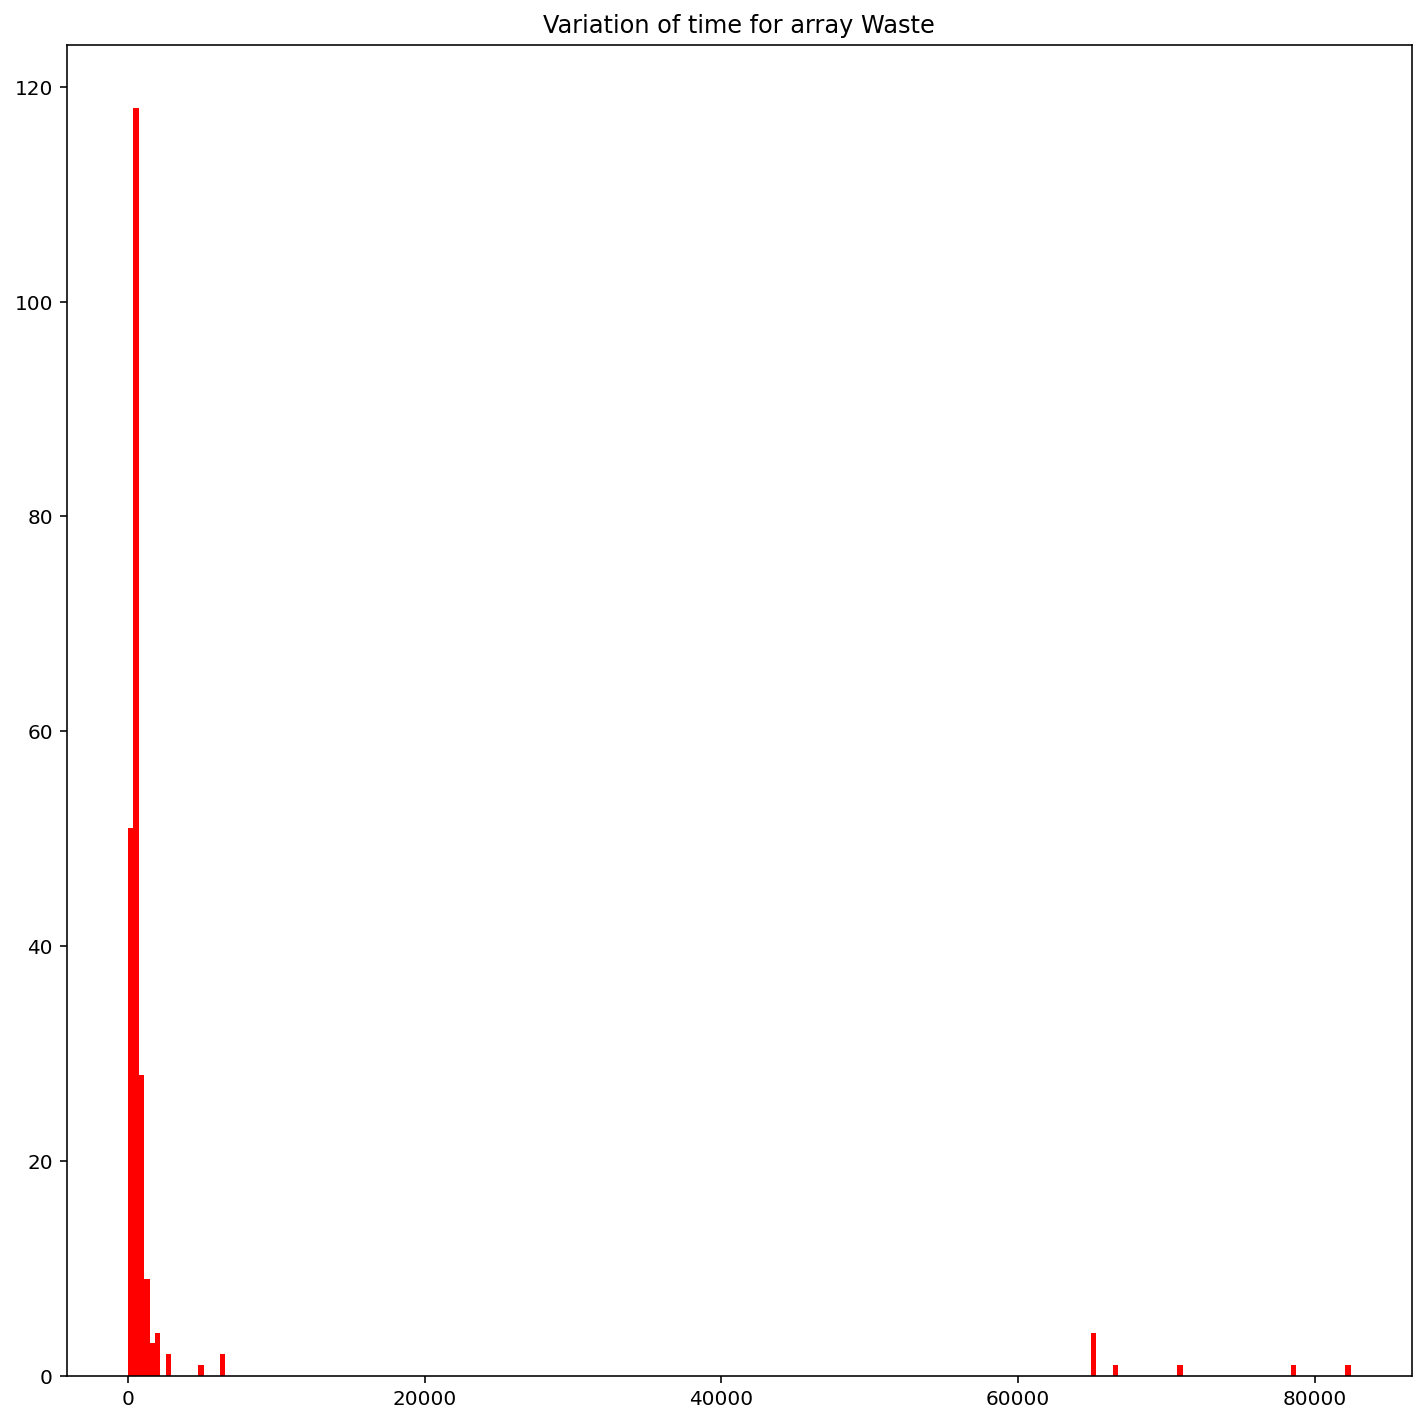

[ 51. 118.  28.   9.   3.]
[   0.          364.61946903  729.23893805 1093.85840708 1458.47787611]


In [10]:
get_time = list(map(lambda array: array[2], std_time_array))
fig, ax = plt.subplots(figsize=(10, 10))
ax.set(title="Variation of time for array Waste")
(n, bins, patches) = ax.hist(get_time, bins =num_waste, facecolor='r')
fig.tight_layout()
plt.show()
print(n[0:5])
print(bins[0:5])

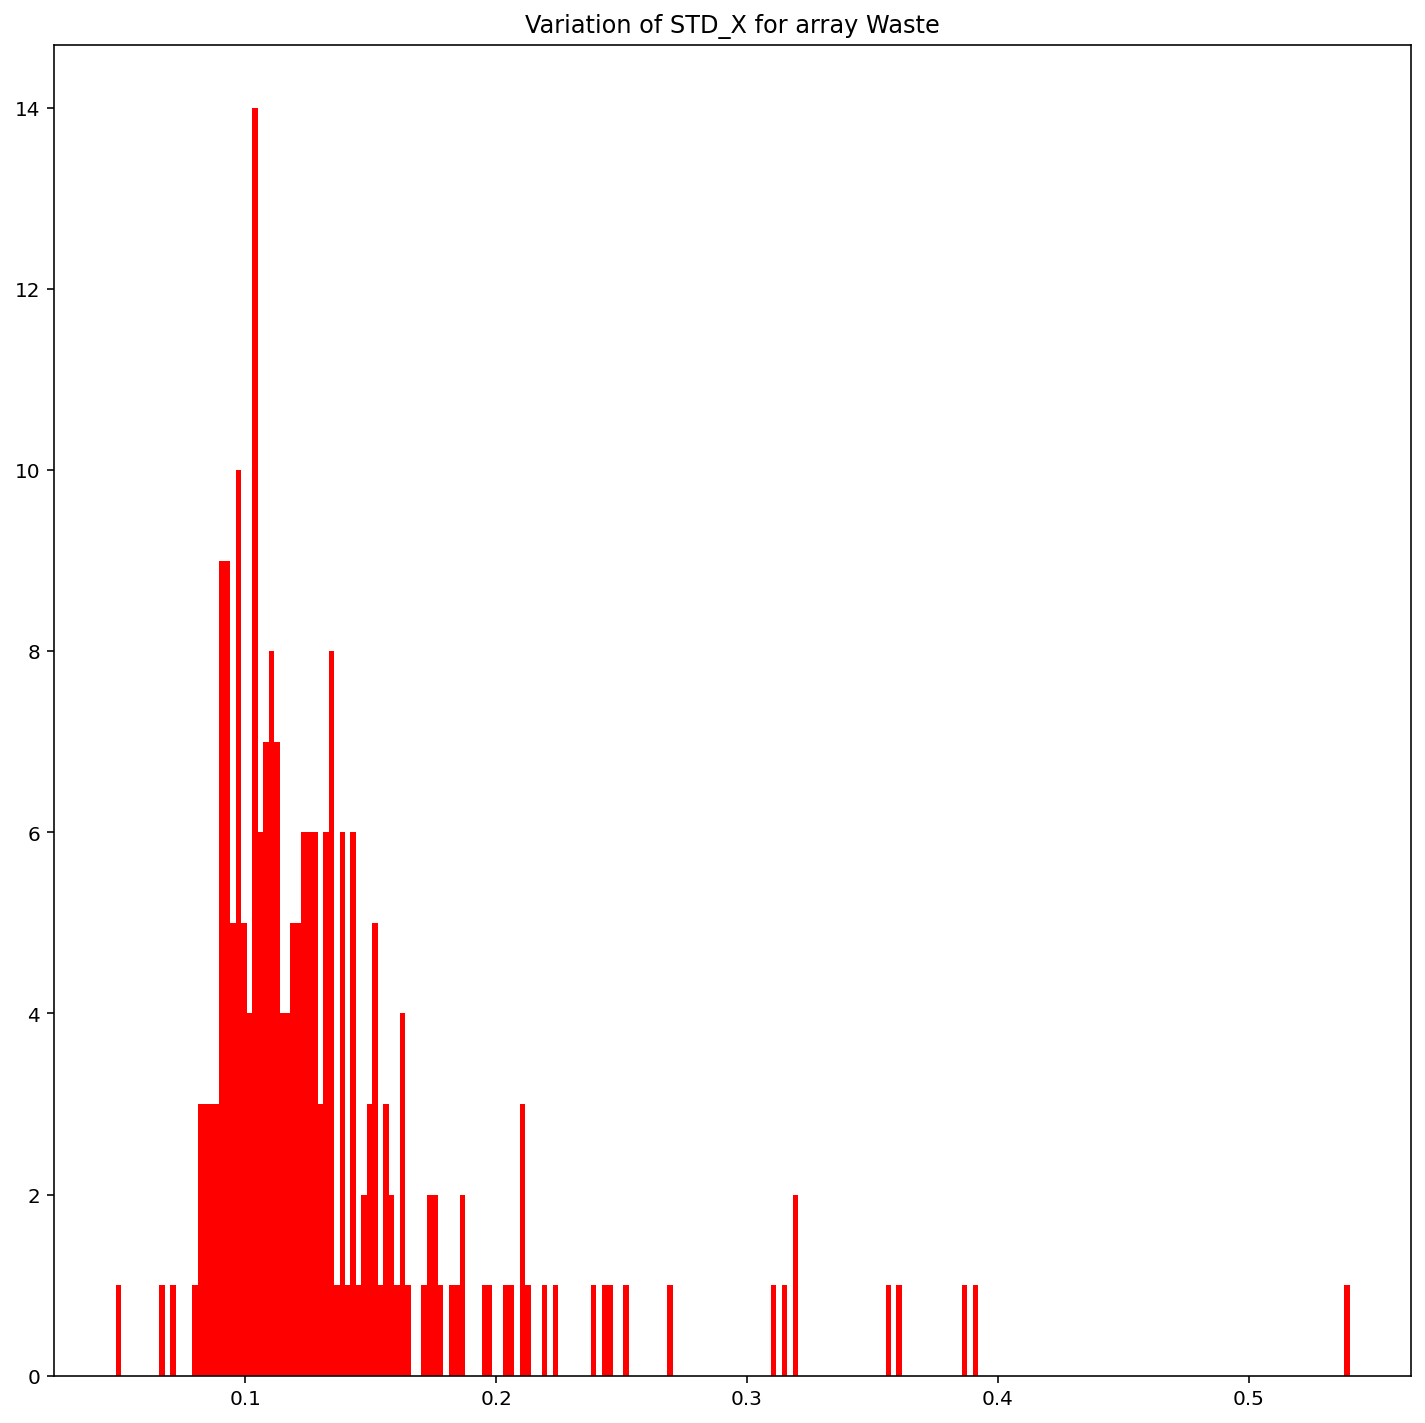

In [11]:
get_STDX = list(map(lambda array: array[0], std_time_array))
fig, ax = plt.subplots(figsize=(10, 10))
ax.set(title="Variation of STD_X for array Waste")
(n, bins, patches) = ax.hist(get_STDX, bins =num_waste, facecolor='r')
fig.tight_layout()
plt.show()

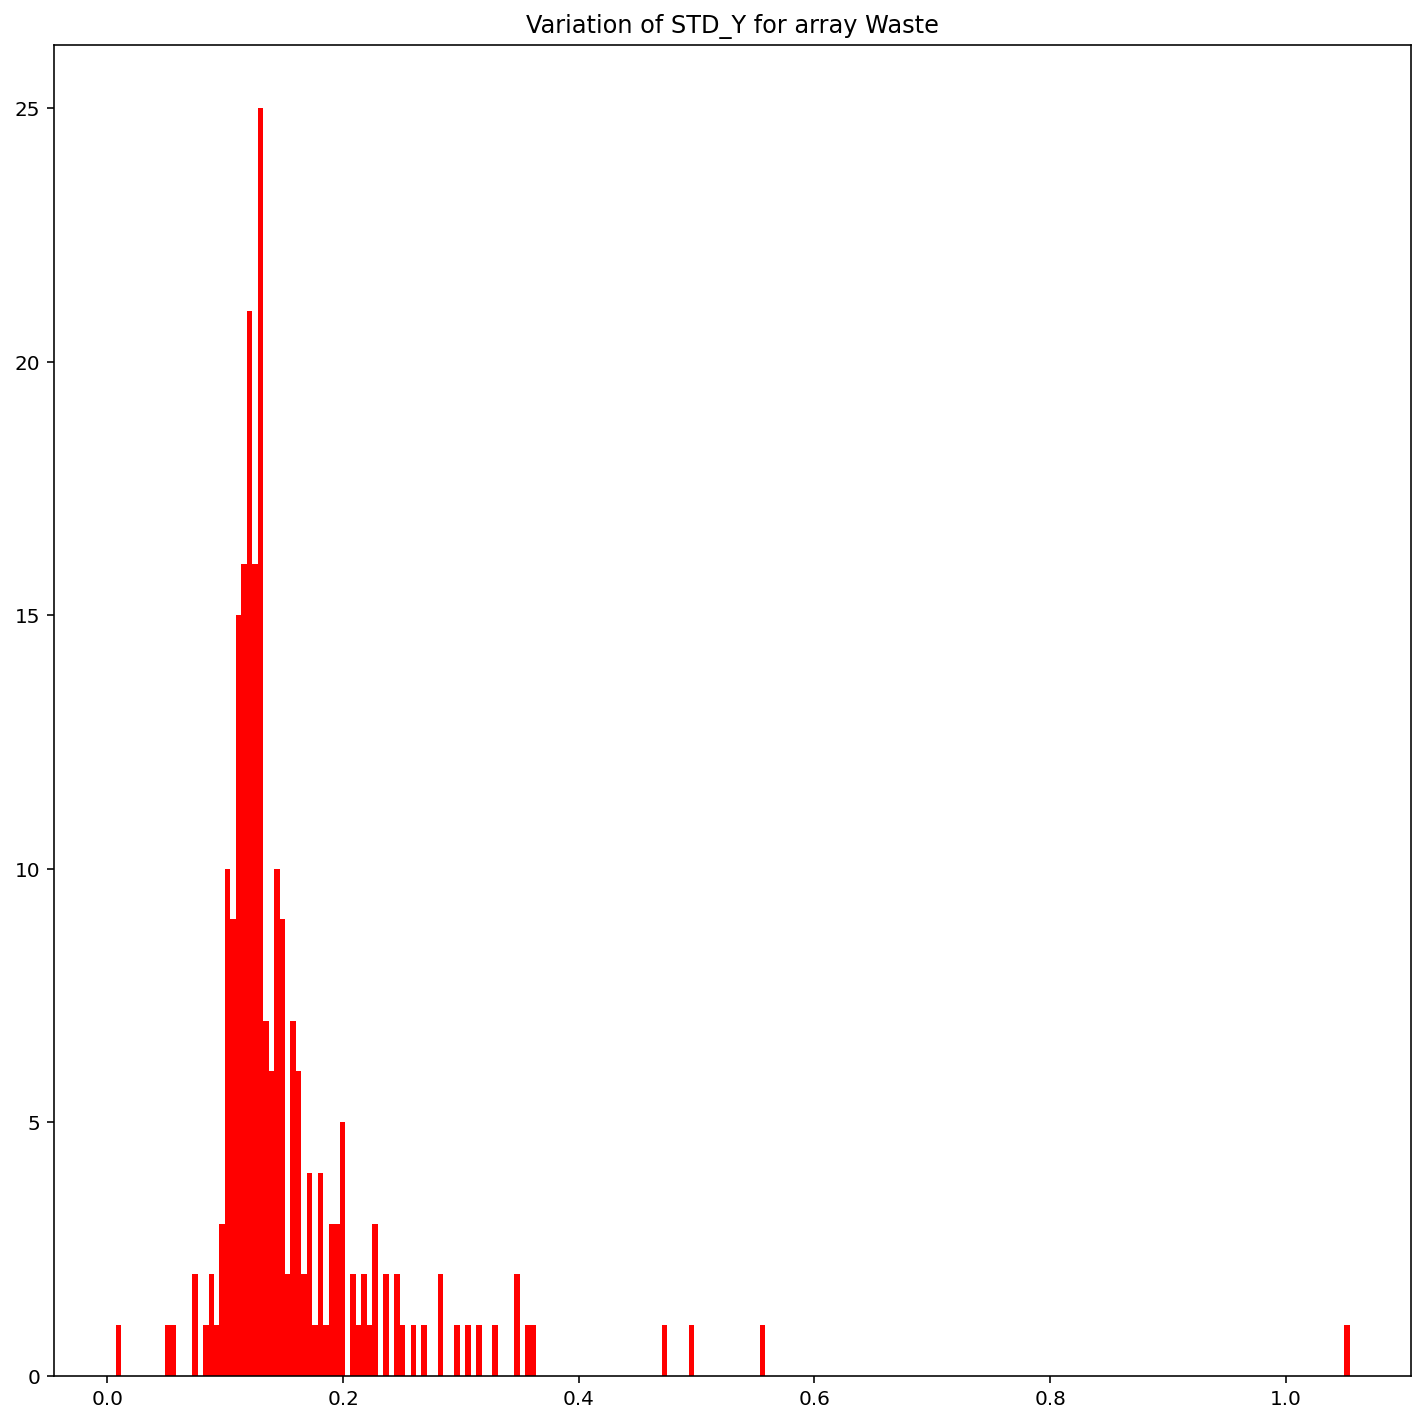

In [12]:
get_STDY = list(map(lambda array: array[1], std_time_array))
fig, ax = plt.subplots(figsize=(10, 10))
ax.set(title="Variation of STD_Y for array Waste")
(n, bins, patches) = ax.hist(get_STDY, bins =num_waste, facecolor='r')
fig.tight_layout()
plt.show()

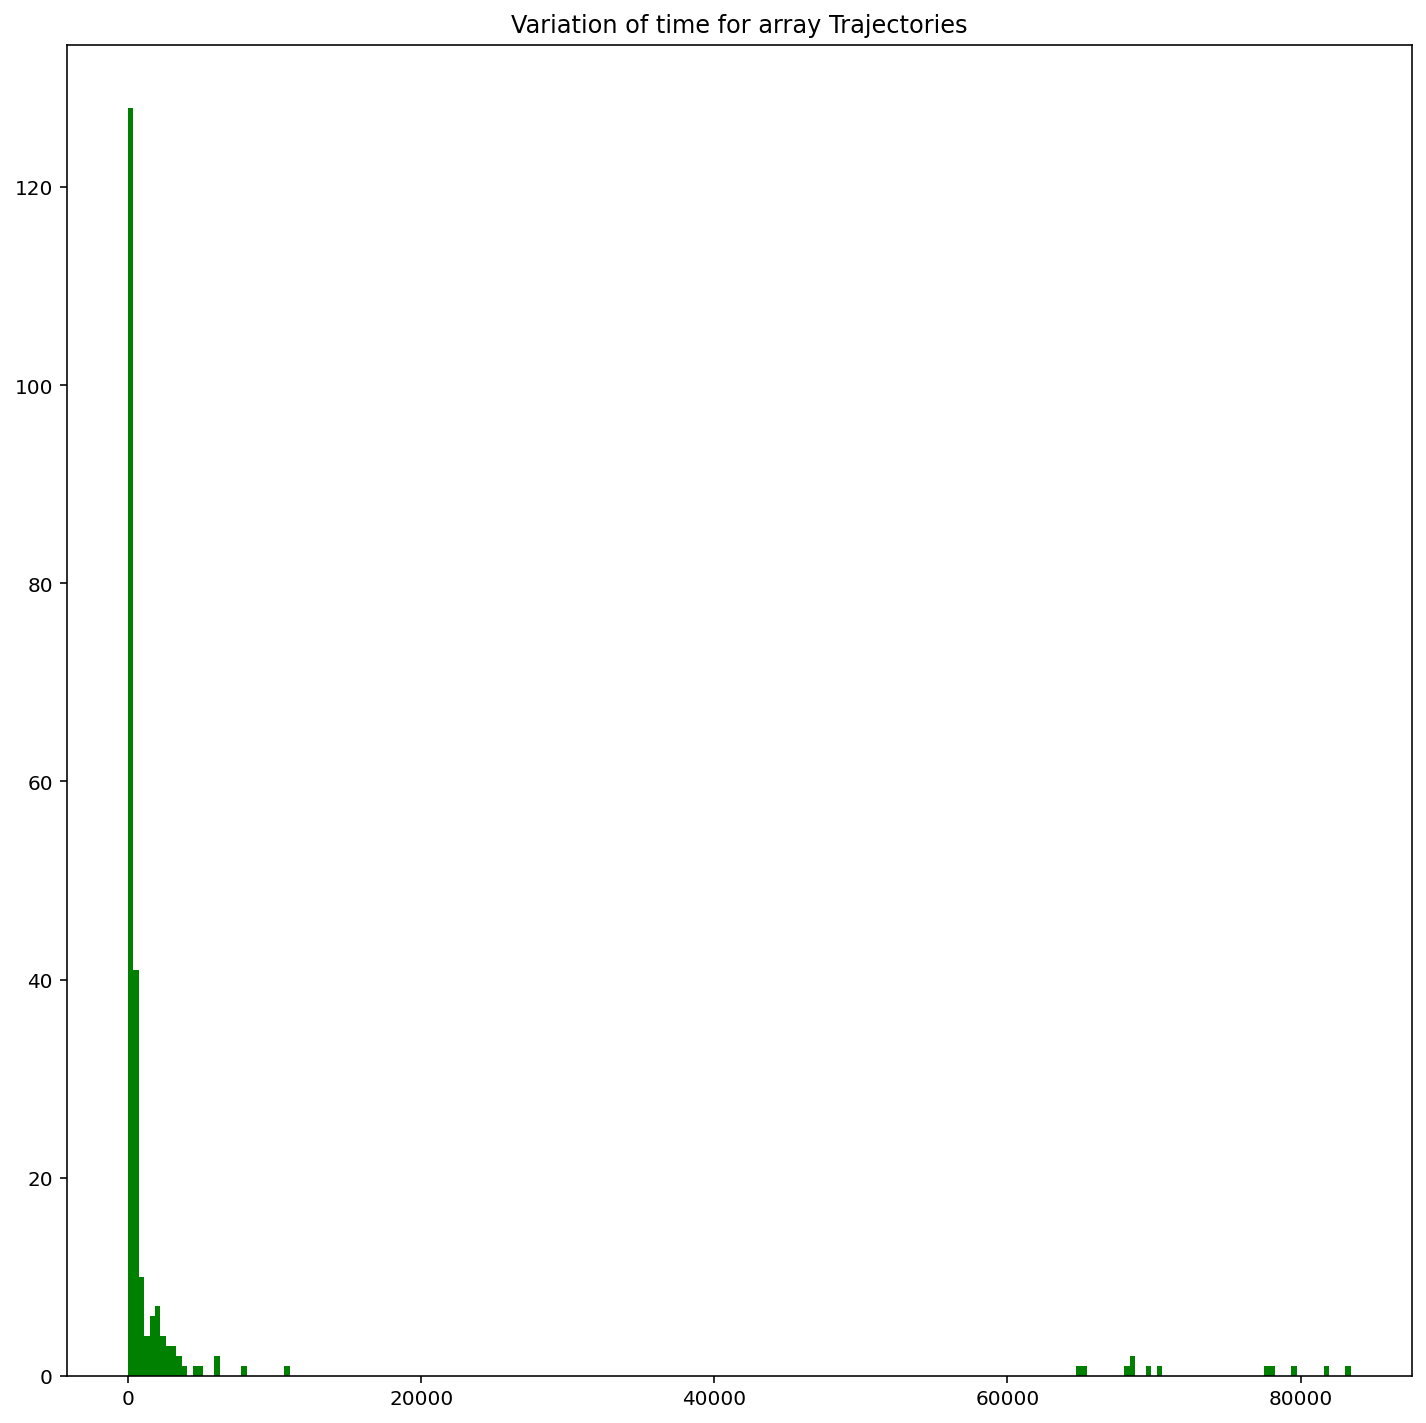

[128.  41.  10.   4.   6.]
[   0.          367.44052863  734.88105727 1102.3215859  1469.76211454]


In [13]:
get_time = list(map(lambda array: array[2], std_time_array_2))
fig, ax = plt.subplots(figsize=(10, 10))
ax.set(title="Variation of time for array Trajectories")
(n, bins, patches) = ax.hist(get_time, bins =num_traj, facecolor='g')
#(n, bins, patches) = ax.hist(get_time, facecolor='g')
fig.tight_layout()
plt.show()
print(n[0:5])
print(bins[0:5])

In [14]:
idx_array = []
for i, row in enumerate(std_time_array_2):
    if row[2] <= 368:
        idx_array.append(i)
#print(idx_array)
print(len(idx_array))

129


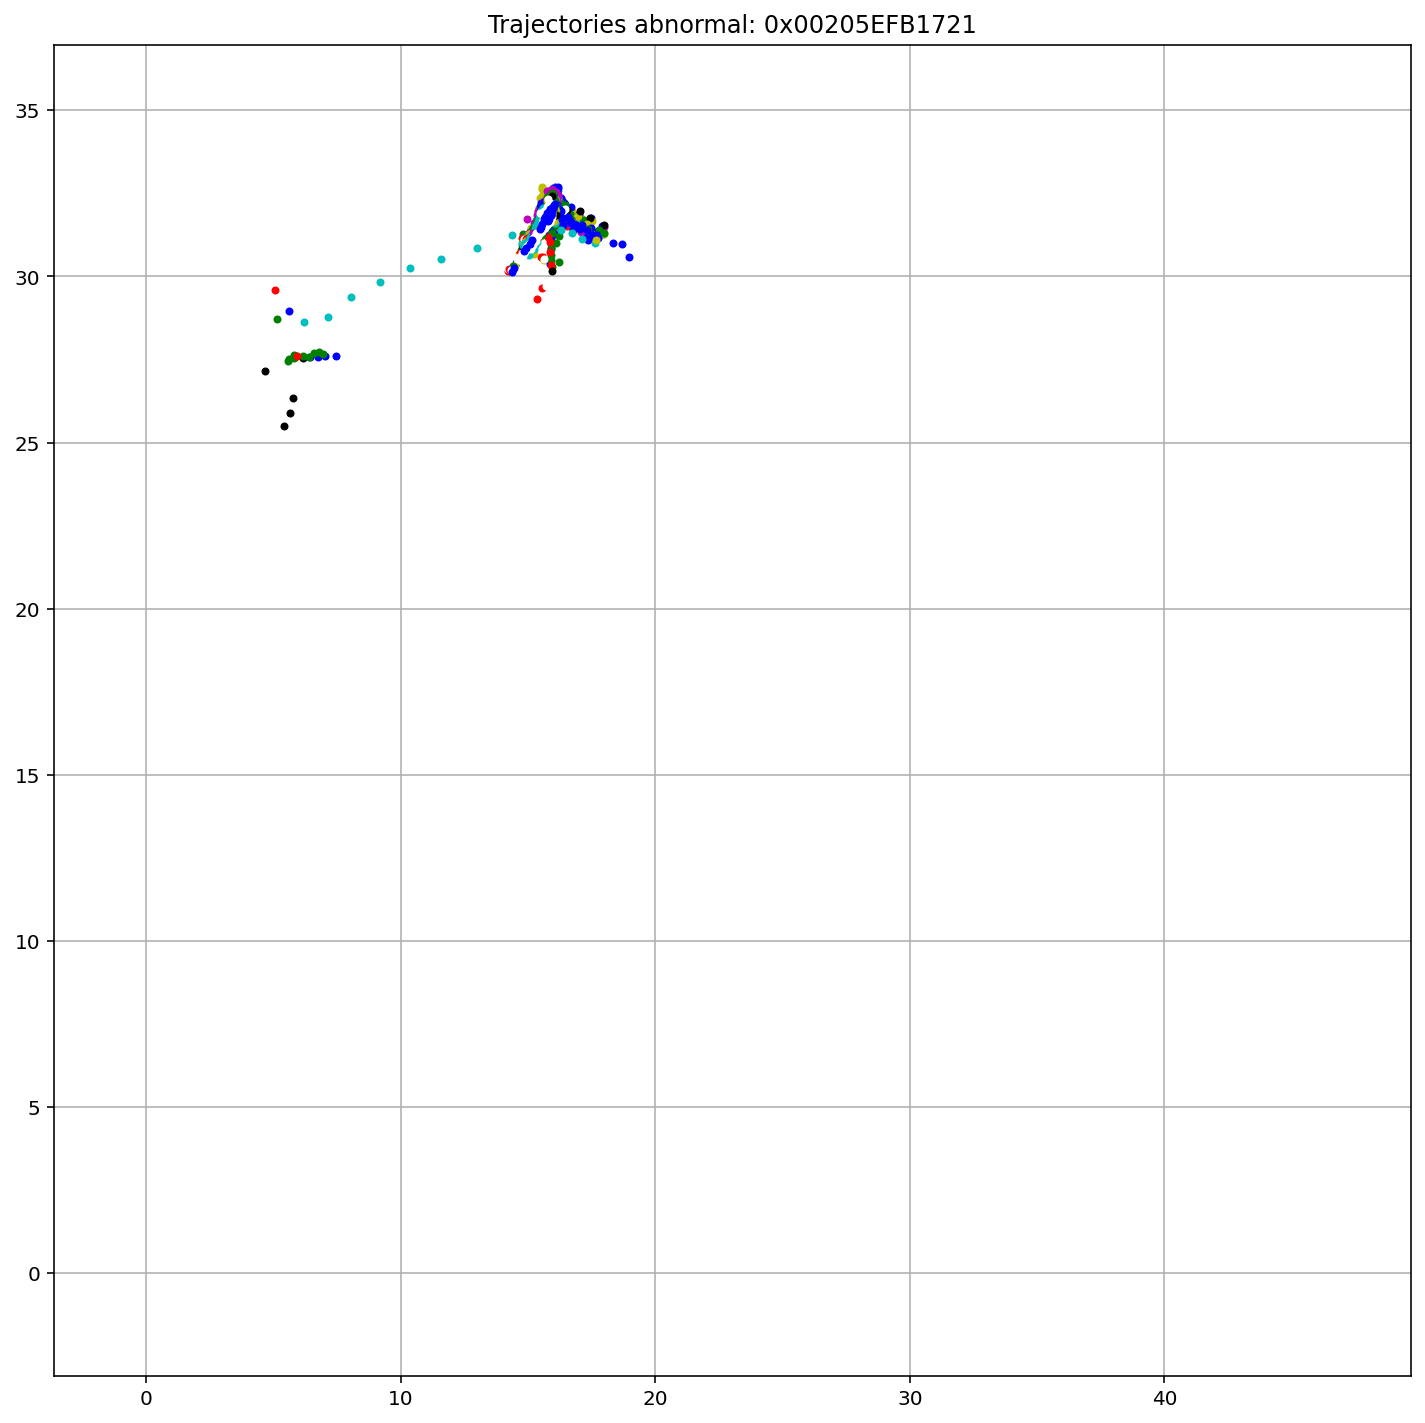

In [31]:
#trajectories found but they are so bad

fig, ax = plt.subplots(figsize=(10, 10))
ax.set(title='Trajectories abnormal')
ax.set_xlim(-3.63, 49.7)
ax.set_ylim(-3.08, 36.97)
ax.grid()
fig.tight_layout()

color = np.array(['b','g','r','c','m','y','k'])
c_idx = 0

for i, idx in enumerate(idx_array):
    traj = trajectories[idx]
    y = traj['y'].values
    x = traj['x'].values
    ax.plot(x, y, f'.{color[c_idx]}')
    if c_idx == len(color)-1:
        c_idx = 0
    else:
        c_idx = c_idx+1

plt.show()

In [16]:
for i, idx in enumerate(idx_array):
    traj = trajectories[idx]
    print(traj)

         id          tag_id                time      x      y  z
25  1379339  0x00205EFB1721 2016-07-01 07:40:27  15.62  32.49  0
26  1543769  0x00205EFB1721 2016-07-01 07:40:28  16.30  31.96  0
         id          tag_id                time      x      y  z
34  1371685  0x00205EFB1721 2016-07-01 08:06:36  15.47  32.09  0
35  1387086  0x00205EFB1721 2016-07-01 08:07:51  14.81  31.29  0
         id          tag_id                time      x      y  z
64  1289632  0x00205EFB1721 2016-07-01 10:00:04  15.82  32.16  0
65  1430907  0x00205EFB1721 2016-07-01 10:00:05  15.50  30.57  0
66  1382112  0x00205EFB1721 2016-07-01 10:00:06  15.33  29.32  0
67  1543957  0x00205EFB1721 2016-07-01 10:00:07  15.56  29.66  0
68  1233114  0x00205EFB1721 2016-07-01 10:00:08  15.60  30.57  0
         id          tag_id                time      x      y  z
84  1410387  0x00205EFB1721 2016-07-01 10:16:59  15.55  32.03  0
85  1523427  0x00205EFB1721 2016-07-01 10:17:01  14.87  31.20  0
          id          tag

            id          tag_id                time      x      y  z
60365  2296474  0x00205EFB1721 2016-07-15 08:45:17  15.71  32.17  0
60366  2347850  0x00205EFB1721 2016-07-15 08:45:18  15.26  31.35  0
60367  2548163  0x00205EFB1721 2016-07-15 08:45:20  15.54  31.69  0
60368  2278354  0x00205EFB1721 2016-07-15 08:45:20  15.46  31.67  0
60369  2299044  0x00205EFB1721 2016-07-15 08:45:21  15.63  31.83  0
...        ...             ...                 ...    ...    ... ..
60464  2275948  0x00205EFB1721 2016-07-15 08:47:09  15.86  32.24  0
60465  2406907  0x00205EFB1721 2016-07-15 08:47:11  15.98  32.29  0
60466  2537915  0x00205EFB1721 2016-07-15 08:47:13  15.87  32.17  0
60467  2370936  0x00205EFB1721 2016-07-15 08:47:15  15.61  31.88  0
60468  2288795  0x00205EFB1721 2016-07-15 08:47:16  14.80  30.89  0

[104 rows x 6 columns]
            id          tag_id                time      x      y  z
60868  2396652  0x00205EFB1721 2016-07-15 08:54:55  16.00  32.00  0
60869  2363321  0x00205E

             id          tag_id                time      x      y  z
107065  2898217  0x00205EFB1721 2016-07-18 07:04:33  15.58  31.74  0
107066  2898212  0x00205EFB1721 2016-07-18 07:04:34  14.80  30.85  0
107067  2852253  0x00205EFB1721 2016-07-18 07:04:35  15.09  31.22  0
107068  2849757  0x00205EFB1721 2016-07-18 07:04:36  15.58  31.95  0
107069  2817147  0x00205EFB1721 2016-07-18 07:04:36  15.40  31.66  0
107070  2877663  0x00205EFB1721 2016-07-18 07:04:38  15.86  32.23  0
             id          tag_id                time      x      y  z
107440  2760683  0x00205EFB1721 2016-07-18 07:11:53  15.64  31.84  0
107441  2783805  0x00205EFB1721 2016-07-18 07:11:55  14.98  30.96  0
107442  2770106  0x00205EFB1721 2016-07-18 07:11:57  14.74  30.55  0
107443  2855735  0x00205EFB1721 2016-07-18 07:11:58  14.10  29.83  0
107444  2844678  0x00205EFB1721 2016-07-18 07:11:59  14.75  30.58  0
107445  2898373  0x00205EFB1721 2016-07-18 07:12:03  14.96  30.90  0
107446  2814634  0x00205EFB1721 20

98


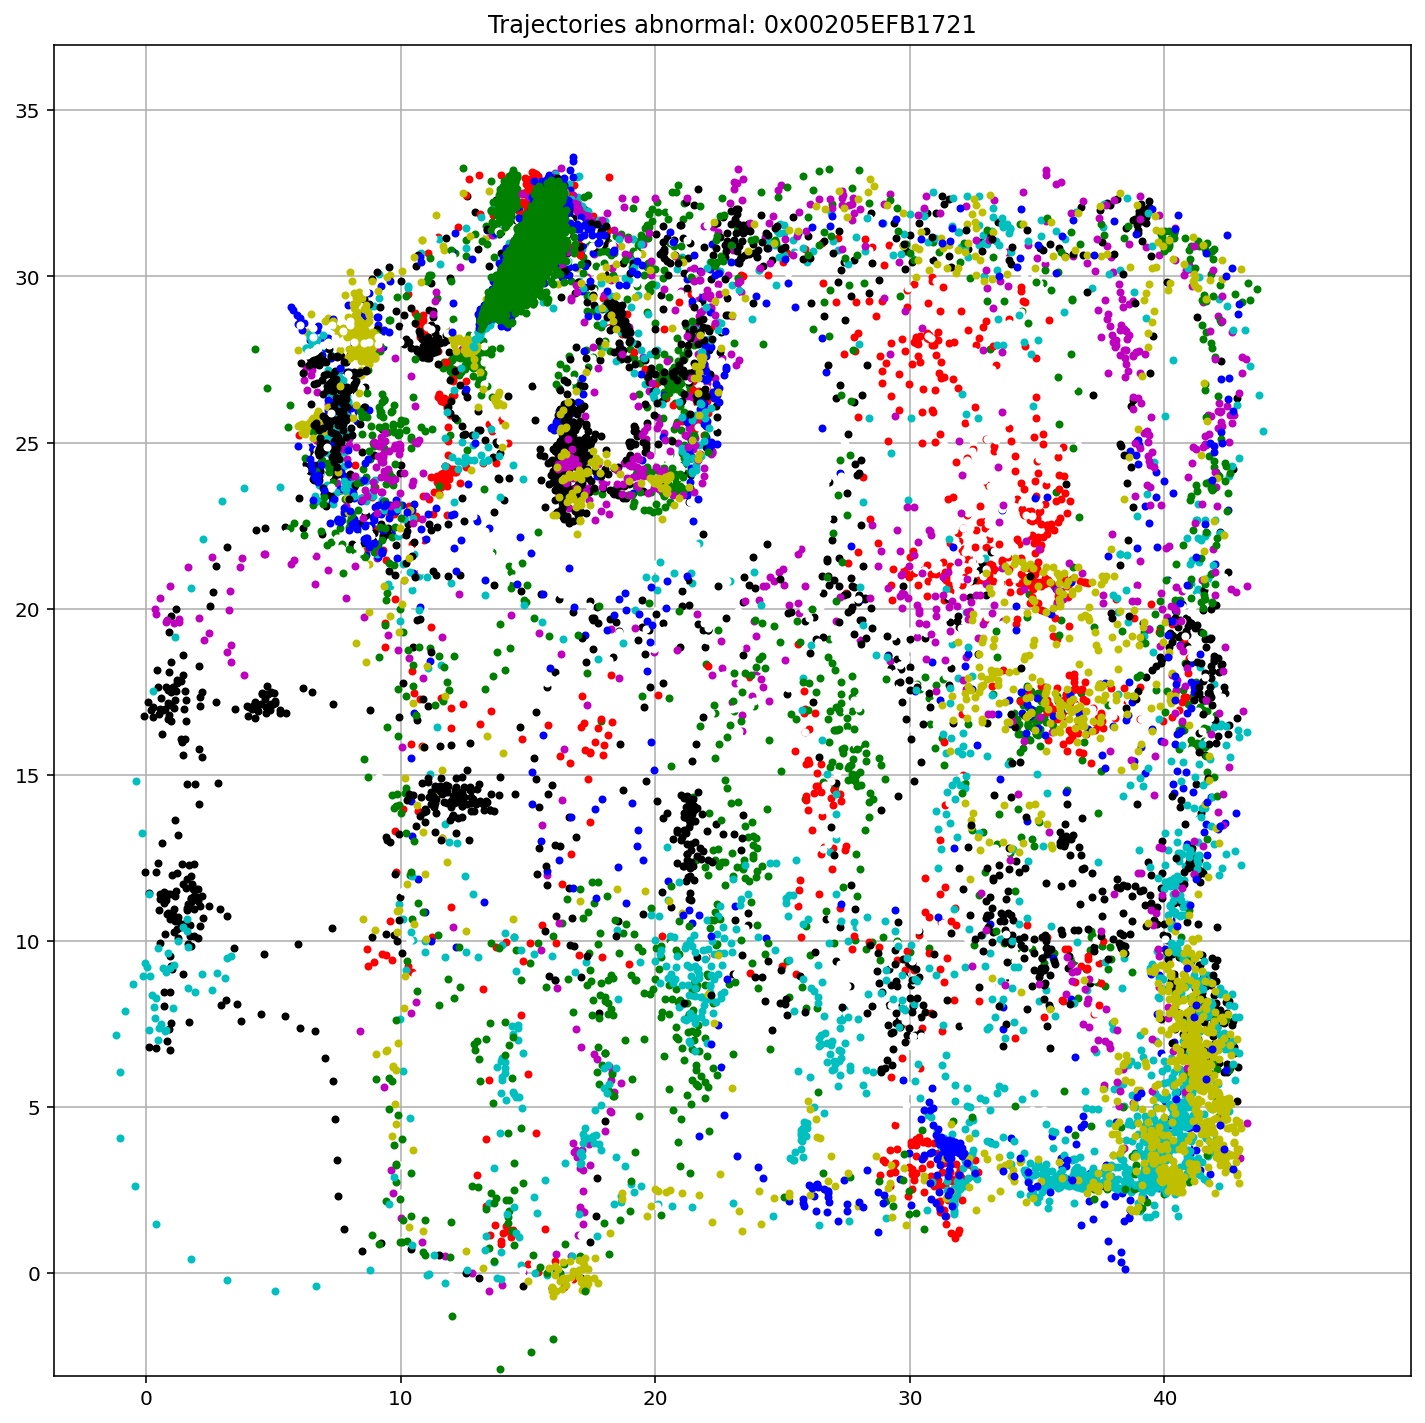

In [17]:
#good trajectories found

numbers = list(range(0,227))
numer_set = set(numbers)
diff = [x for x in numer_set if x not in idx_array]
print(len(diff))

fig, ax = plt.subplots(figsize=(10, 10))
ax.set(title='Good rajectories')
ax.set_xlim(-3.63, 49.7)
ax.set_ylim(-3.08, 36.97)
ax.grid()
fig.tight_layout()

color = np.array(['b','g','r','c','m','y','k'])
c_idx = 0

for i, idx in enumerate(diff):
    traj = trajectories[idx]
    y = traj['y'].values
    x = traj['x'].values
    ax.plot(x, y, f'.{color[c_idx]}')
    if c_idx == len(color)-1:
        c_idx = 0
    else:
        c_idx = c_idx+1

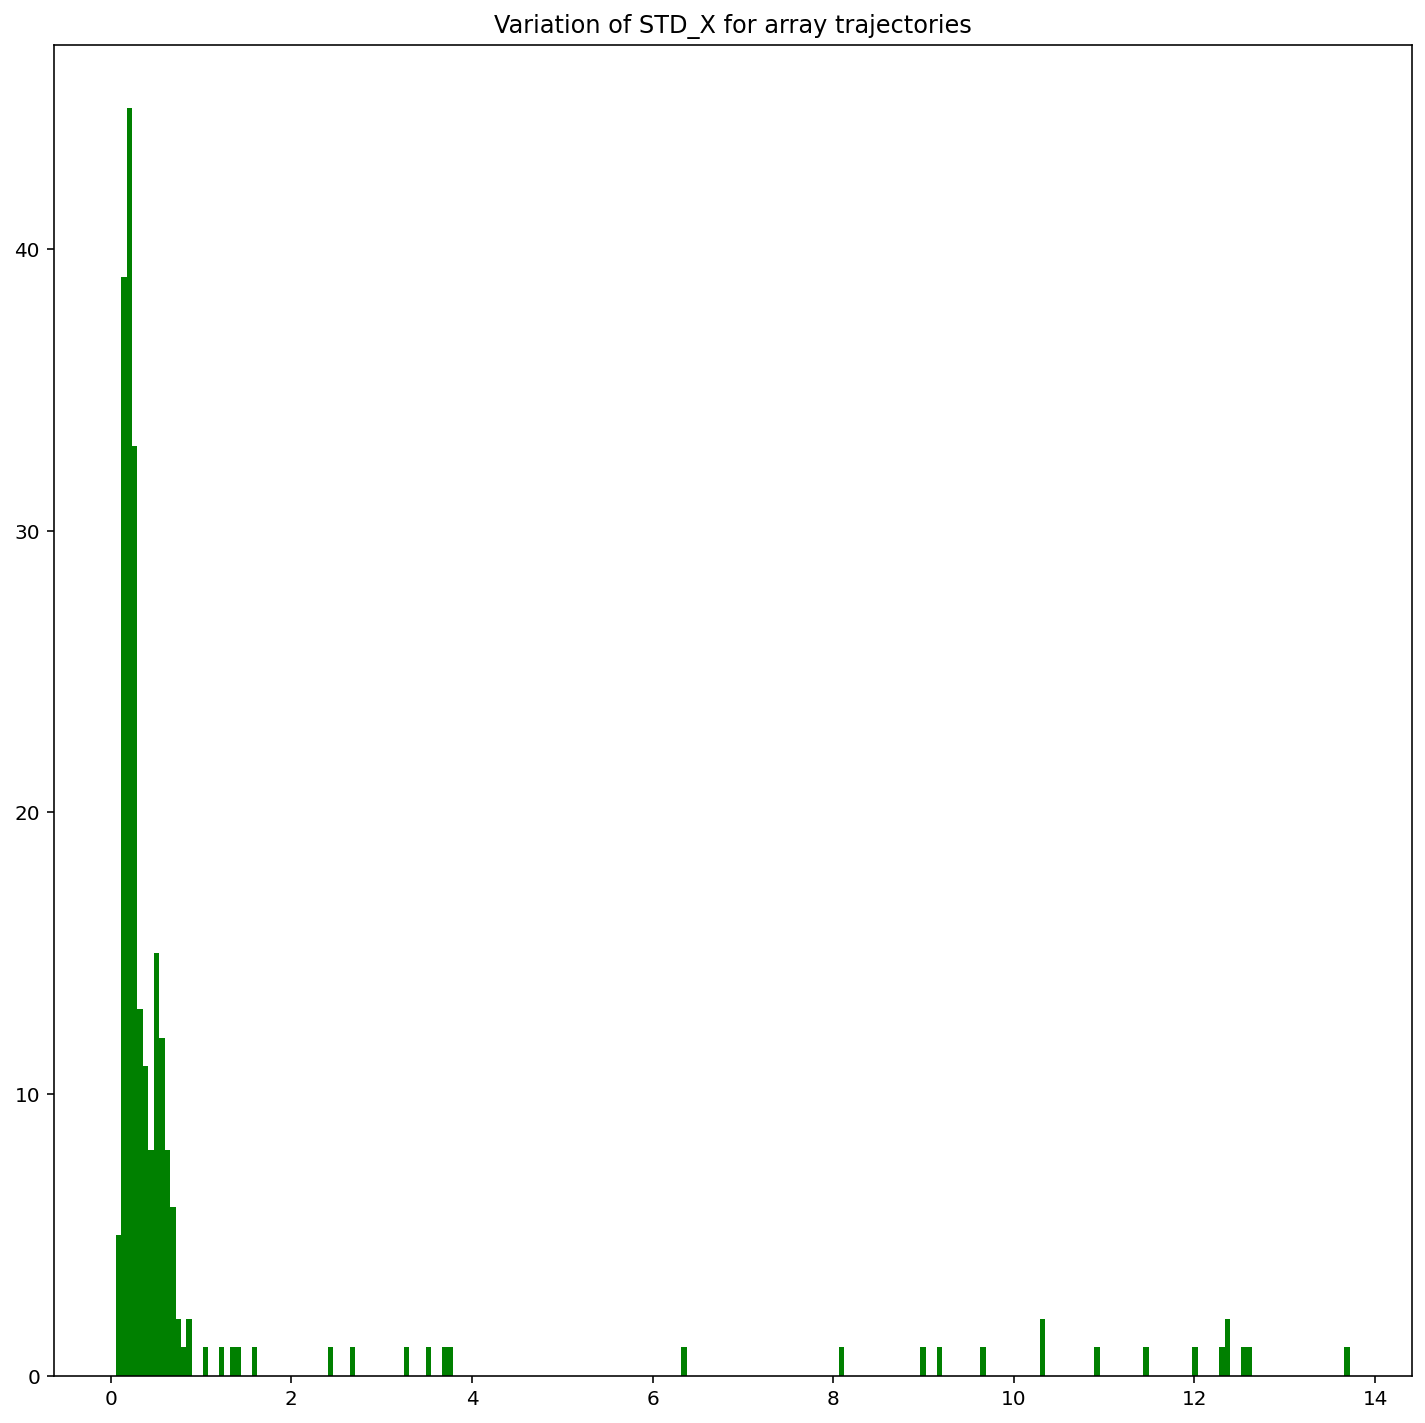

In [18]:
get_STDX = list(map(lambda array: array[0], std_time_array_2))
fig, ax = plt.subplots(figsize=(10, 10))
ax.set(title="Variation of STD_X for array trajectories")
(n, bins, patches) = ax.hist(get_STDX, bins =num_traj, facecolor='g')
fig.tight_layout()
plt.show()

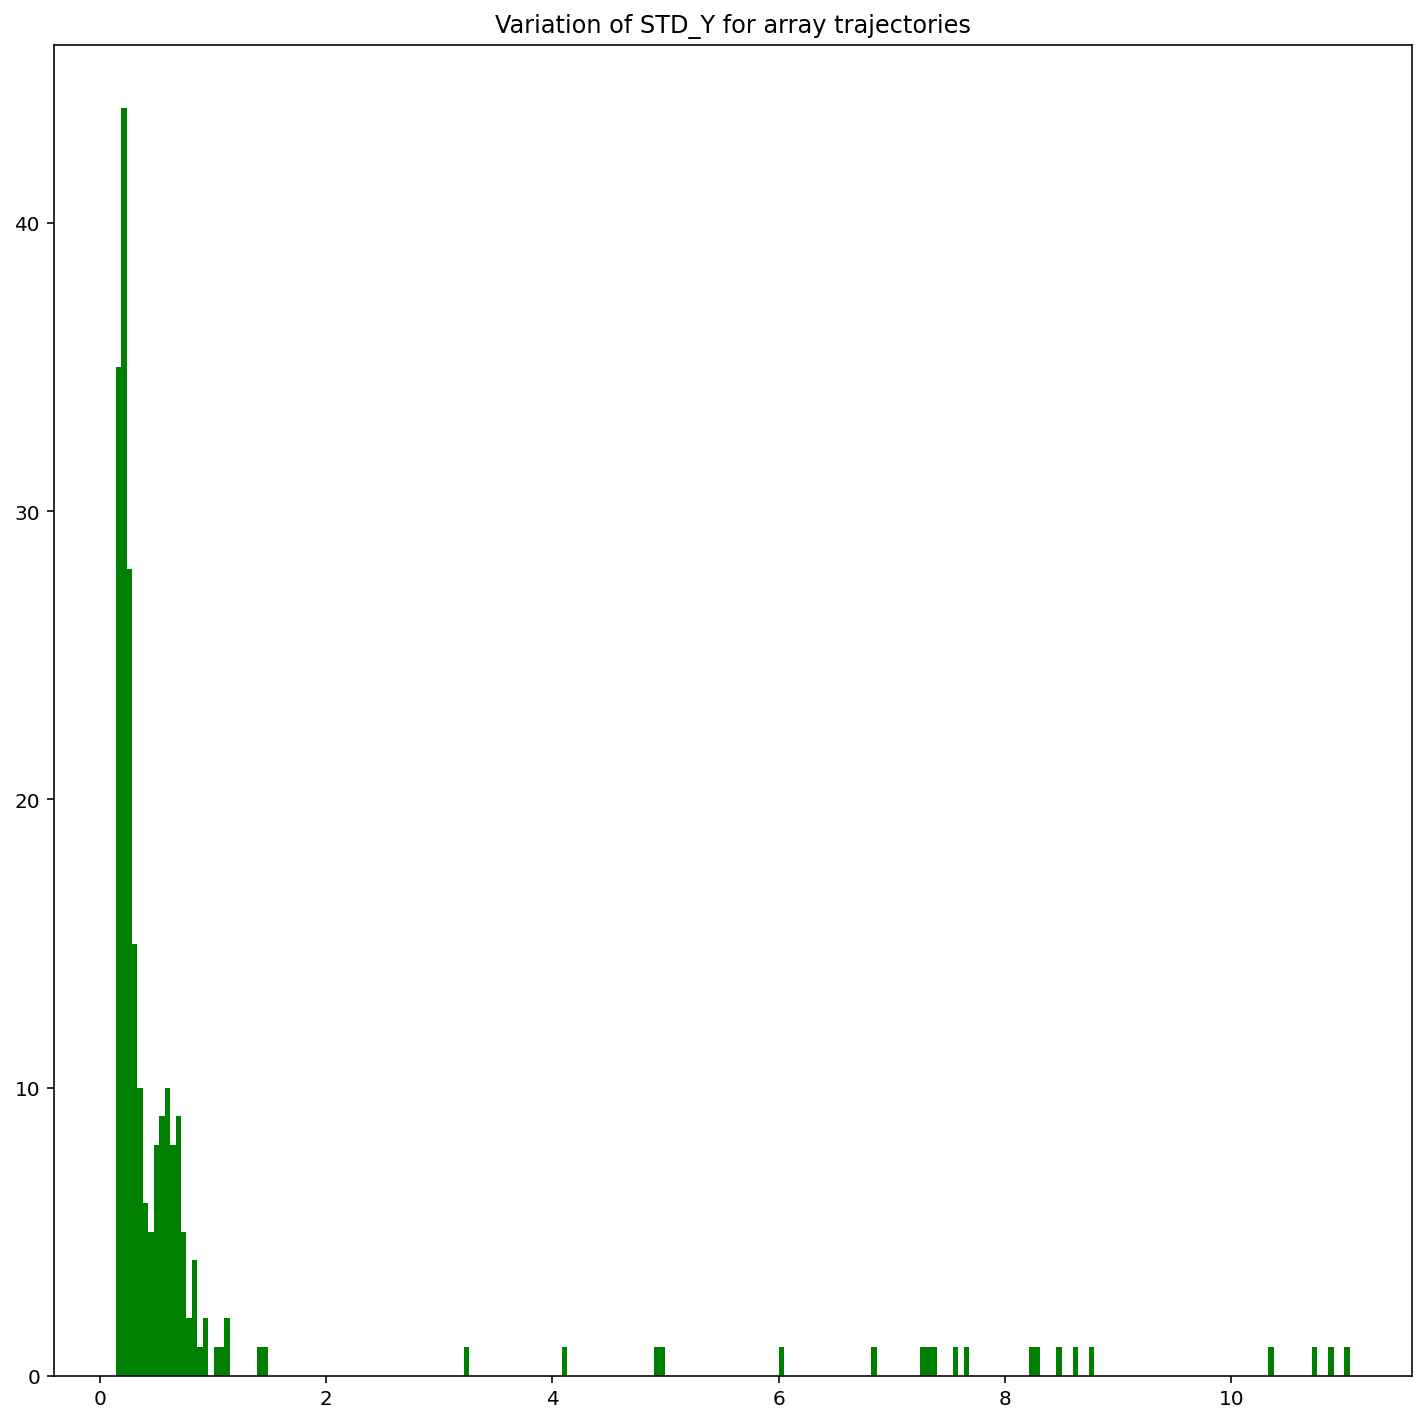

In [19]:
get_STDY = list(map(lambda array: array[1], std_time_array_2))
fig, ax = plt.subplots(figsize=(10, 10))
ax.set(title="Variation of STD_Y for array trajectories")
(n, bins, patches) = ax.hist(get_STDY, bins =num_traj, facecolor='g')
fig.tight_layout()
plt.show()

## 3° approach 
1 + 2 approach

In [9]:
def find_trajectory_3(array, thrs_1, thrs_2):
    trajectories = []
    waste = []
    sub_traj = find_trajectory(array)
    clear_traj = remove_cluster_point(sub_traj, thrs_1)
    for idx, traj in enumerate(clear_traj):
        t, w = find_trajectory_2(traj, thrs_2)
        trajectories += t
        waste += w
    return trajectories, waste


In [10]:
trajectories, waste = find_trajectory_3(sub_data2,1, 0.568 )
print(f"number of trajectories :{len(trajectories)}, number of wasted trajectories: {len(waste)}")

number of trajectories :29, number of wasted trajectories: 7


In [205]:
clear_traj[16]

,id,tag_id,time,x,y,z
9561,1534824,0x00205EFB1721,2016-07-09 10:05:41,16.32,30.28,0
9562,1614401,0x00205EFB1721,2016-07-09 10:05:42,15.93,30.34,0
9563,1719766,0x00205EFB1721,2016-07-09 10:05:44,15.56,30.77,0
9564,1827661,0x00205EFB1721,2016-07-09 10:05:45,15.57,31.17,0
9565,1622141,0x00205EFB1721,2016-07-09 10:05:47,15.65,31.41,0
...,...,...,...,...,...,...
11122,1871686,0x00205EFB1721,2016-07-09 11:25:15,12.43,32.51,0
11123,1632771,0x00205EFB1721,2016-07-09 11:25:16,13.46,32.56,0
11124,1625031,0x00205EFB1721,2016-07-09 11:25:17,14.47,32.68,0
11125,1689286,0x00205EFB1721,2016-07-09 11:25:18,15.35,32.82,0


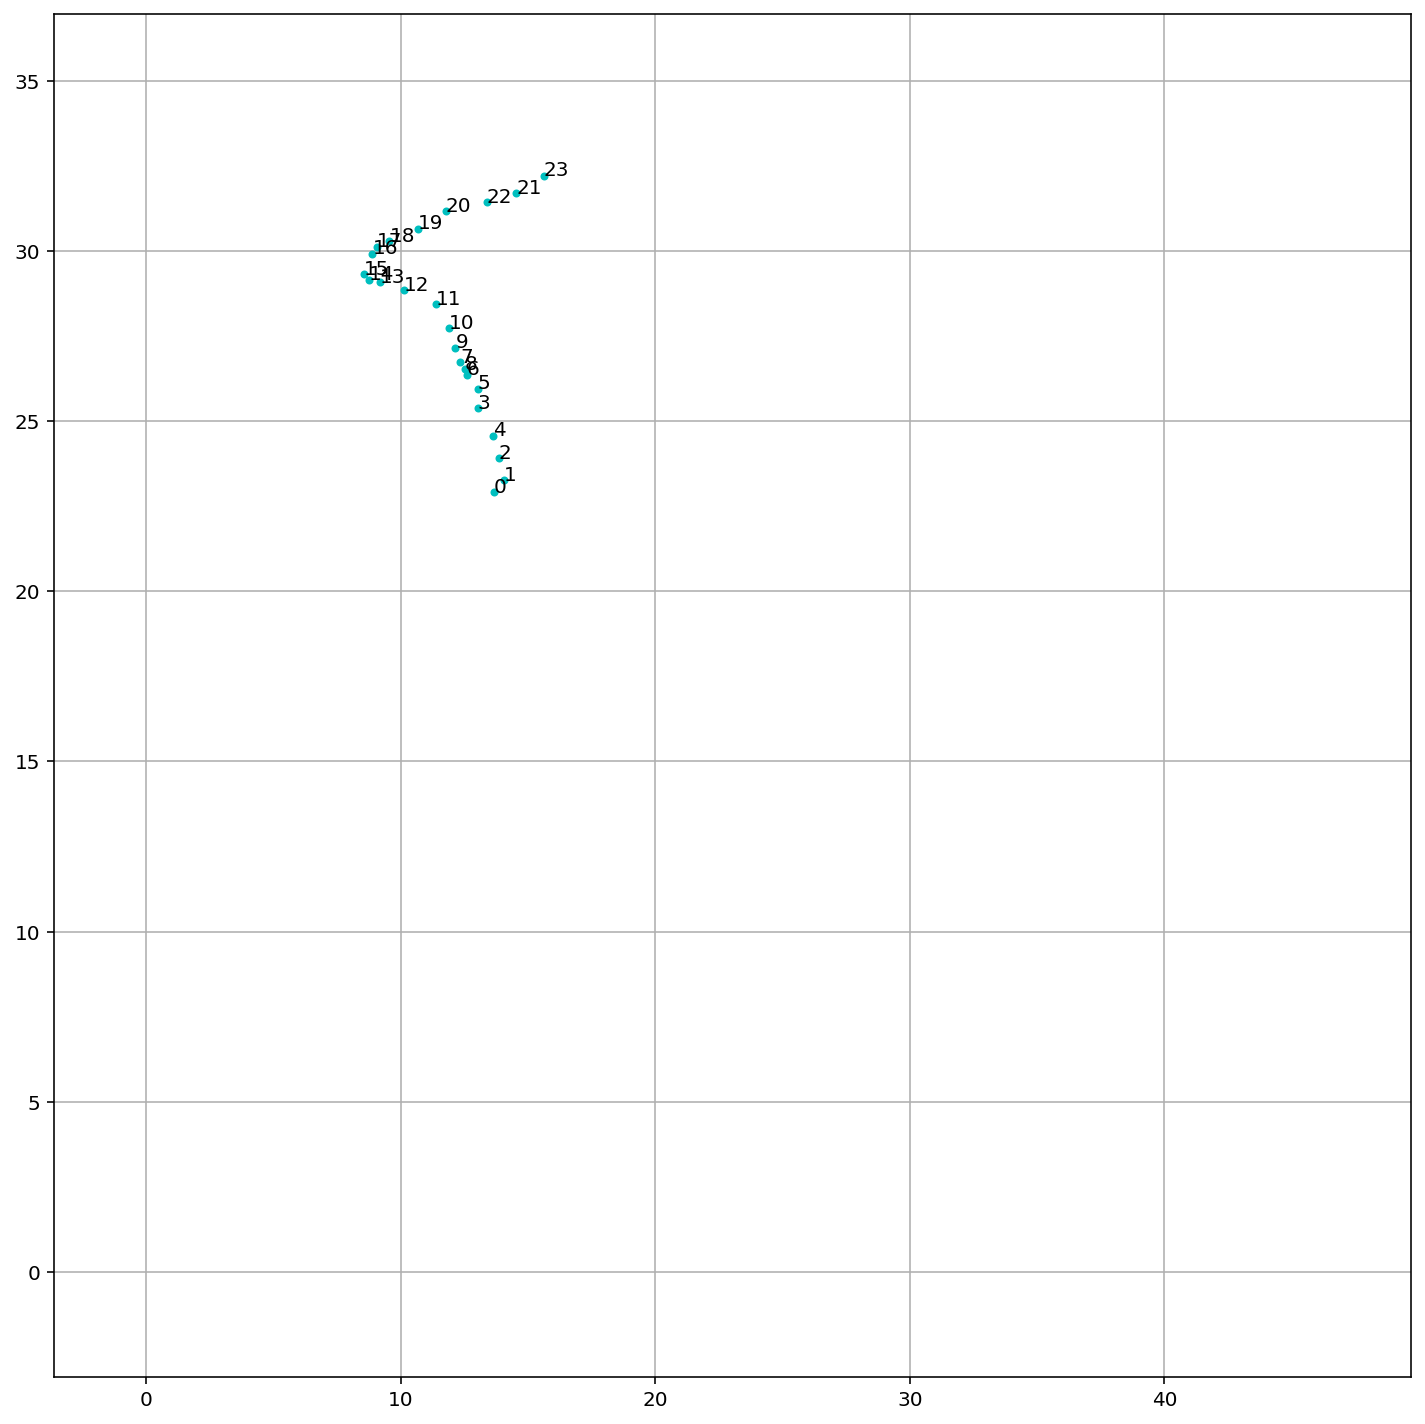

           id          tag_id                time      x      y  z
7533  1553317  0x00205EFB1721 2016-07-08 09:00:43  13.65  22.91  0
7534  1558477  0x00205EFB1721 2016-07-08 09:00:45  14.04  23.27  0
7535  1455743  0x00205EFB1721 2016-07-08 09:00:46  13.84  23.91  0
7536  1746018  0x00205EFB1721 2016-07-08 09:00:48  13.02  25.38  0
7537  1489097  0x00205EFB1721 2016-07-08 09:00:48  13.61  24.57  0
7538  1576463  0x00205EFB1721 2016-07-08 09:00:49  13.02  25.95  0
7539  1830793  0x00205EFB1721 2016-07-08 09:00:50  12.58  26.36  0
7540  1550774  0x00205EFB1721 2016-07-08 09:00:52  12.32  26.73  0
7541  1594447  0x00205EFB1721 2016-07-08 09:00:52  12.52  26.52  0
7542  1620138  0x00205EFB1721 2016-07-08 09:00:53  12.14  27.16  0
7543  1686933  0x00205EFB1721 2016-07-08 09:00:54  11.89  27.73  0
7544  1545658  0x00205EFB1721 2016-07-08 09:00:55  11.37  28.44  0
7545  1758866  0x00205EFB1721 2016-07-08 09:00:57  10.11  28.84  0
7546  1401800  0x00205EFB1721 2016-07-08 09:00:57   9.18  29.0

In [21]:
#shorter (<2m) trajectories 2,6,7,8,9,15,17,21,26

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(-3.63, 49.7)
ax.set_ylim(-3.08, 36.97)
ax.grid()
fig.tight_layout()

traj = trajectories[15]
y = traj['y'].values
x = traj['x'].values
ax.plot(x, y, '.c')
for i in range(len(x)):
    plt.text(x[i], y[i], str(i))
plt.show()

print(traj)

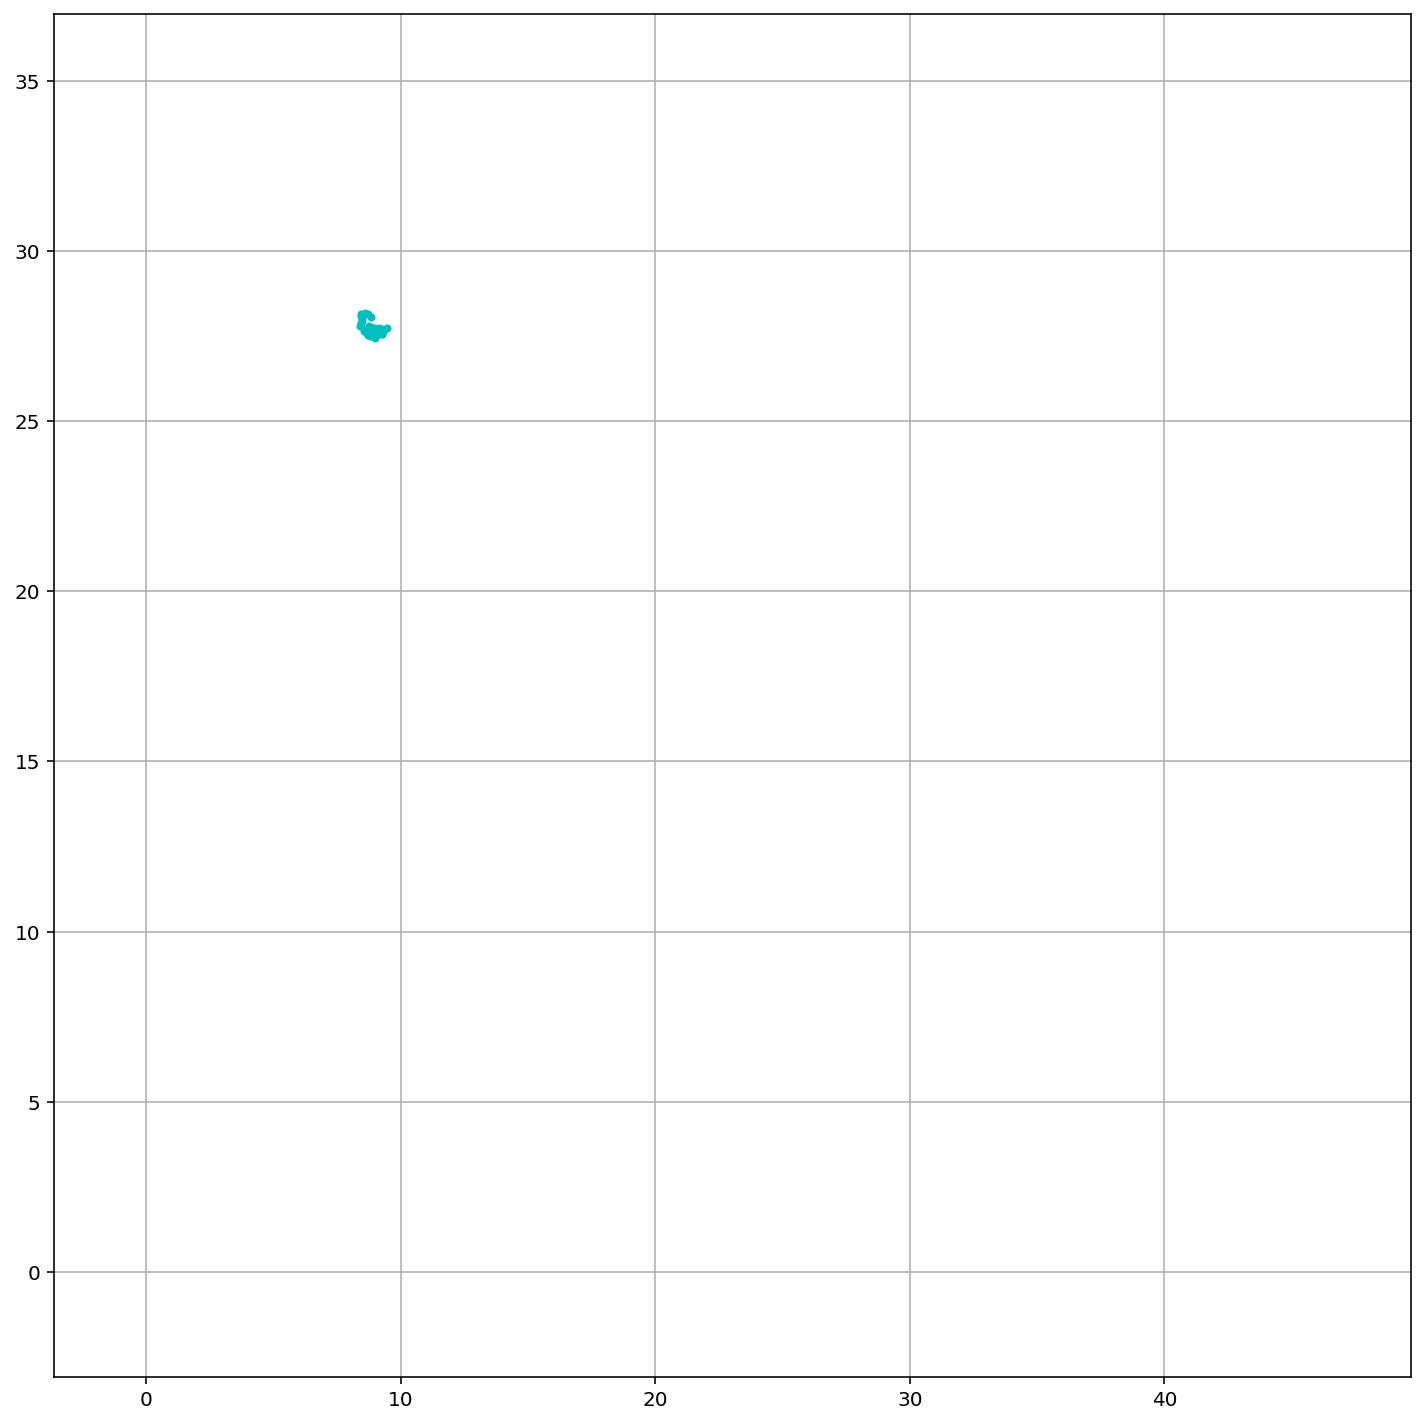

            id          tag_id                time     x      y  z
10132  1871466  0x00205EFB1721 2016-07-09 10:29:06  8.81  28.05  0
10133  1632551  0x00205EFB1721 2016-07-09 10:29:07  8.69  28.16  0
10134  1655670  0x00205EFB1721 2016-07-09 10:29:09  8.45  28.15  0
10135  1537469  0x00205EFB1721 2016-07-09 10:29:09  8.58  28.19  0
10136  1820087  0x00205EFB1721 2016-07-09 10:29:10  8.45  28.08  0
...        ...             ...                 ...   ...    ... ..
10229  1550333  0x00205EFB1721 2016-07-09 10:34:06  8.67  27.67  0
10230  1768728  0x00205EFB1721 2016-07-09 10:34:08  8.69  27.65  0
10231  1463047  0x00205EFB1721 2016-07-09 10:34:19  8.68  27.63  0
10232  1581162  0x00205EFB1721 2016-07-09 10:34:20  8.63  27.61  0
10233  1748177  0x00205EFB1721 2016-07-09 10:34:22  8.72  27.61  0

[102 rows x 6 columns]


In [207]:
#clear_traj 2, traj 2-3, waste 0
#clear_traj 4, traj 5-6-7-8-9, waste 1-2-3-4 (ultima parte frammentata)
#clear_traj 15, traj 20-21, waste 5
#clear_traj 16, traj 22-23, waste 6 (bella)



fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(-3.63, 49.7)
ax.set_ylim(-3.08, 36.97)
ax.grid()
fig.tight_layout()
traj = waste[6]
y = traj['y'].values
x = traj['x'].values
ax.plot(x, y, '.c')
plt.show()

print(traj)

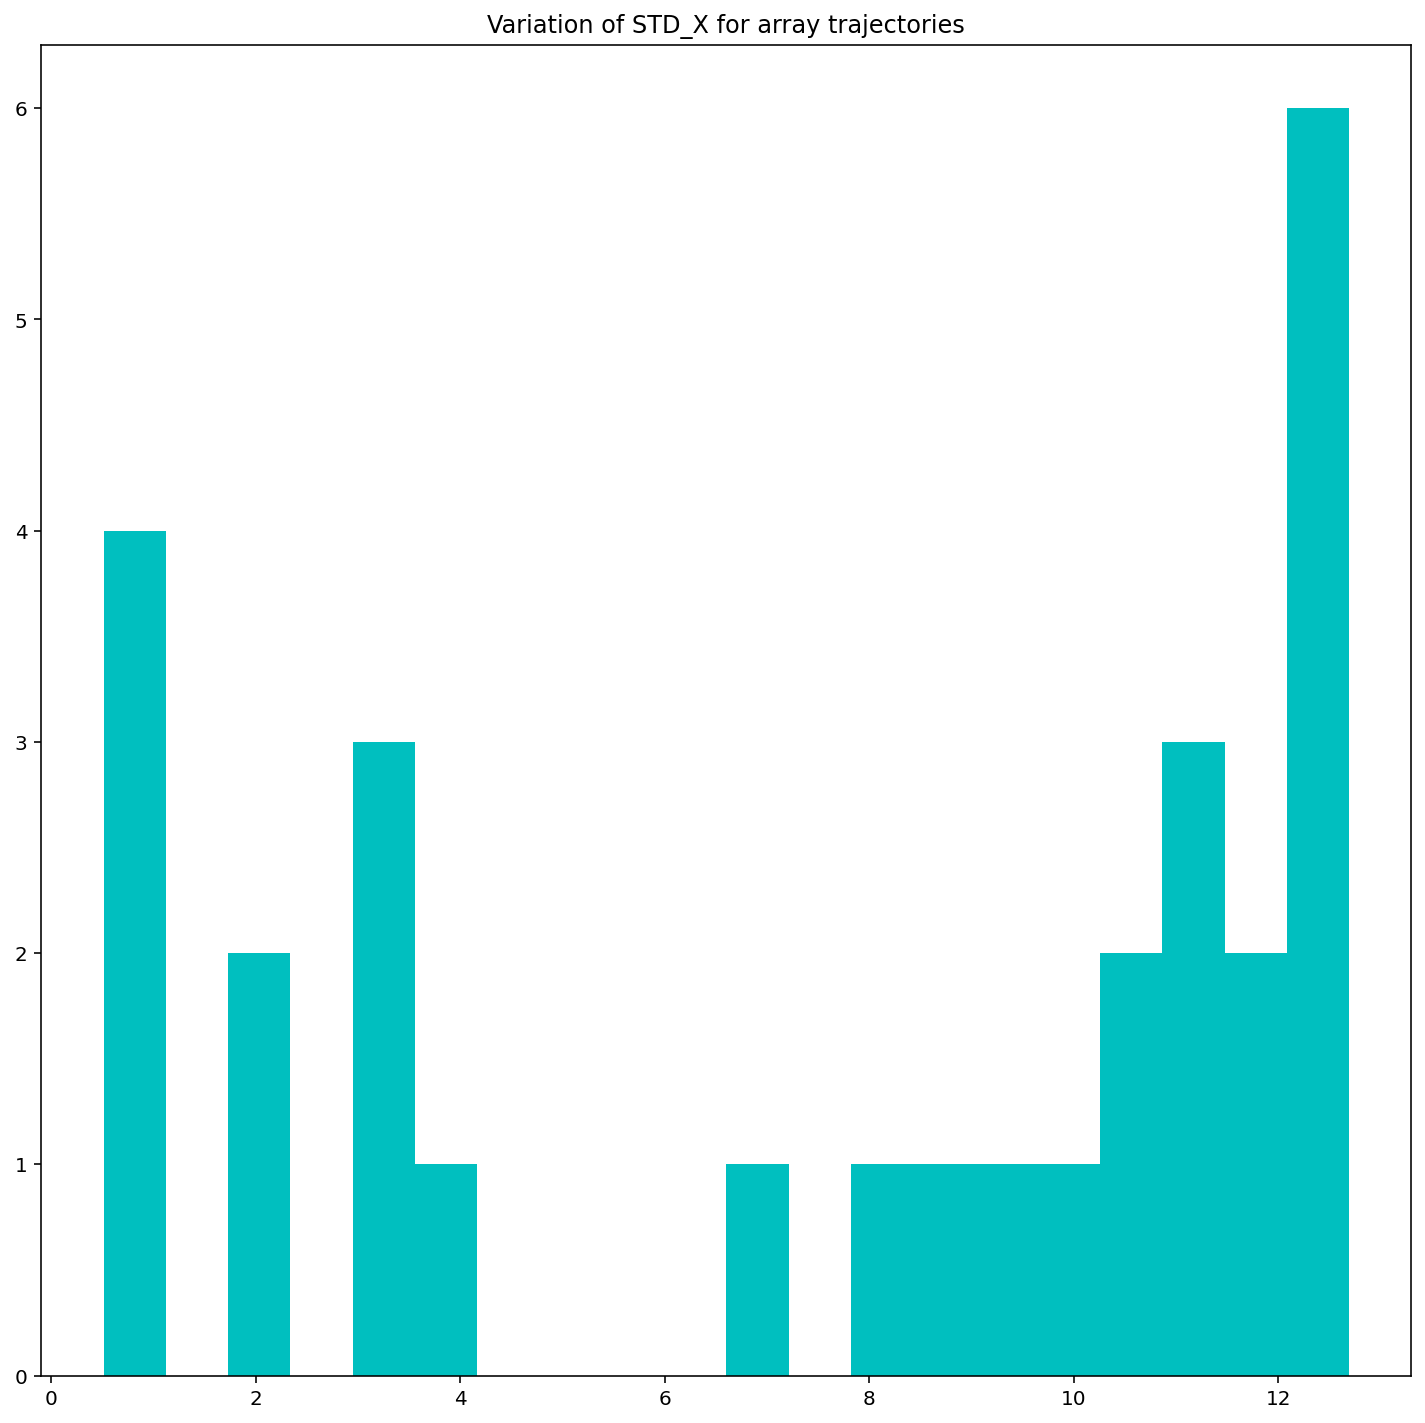

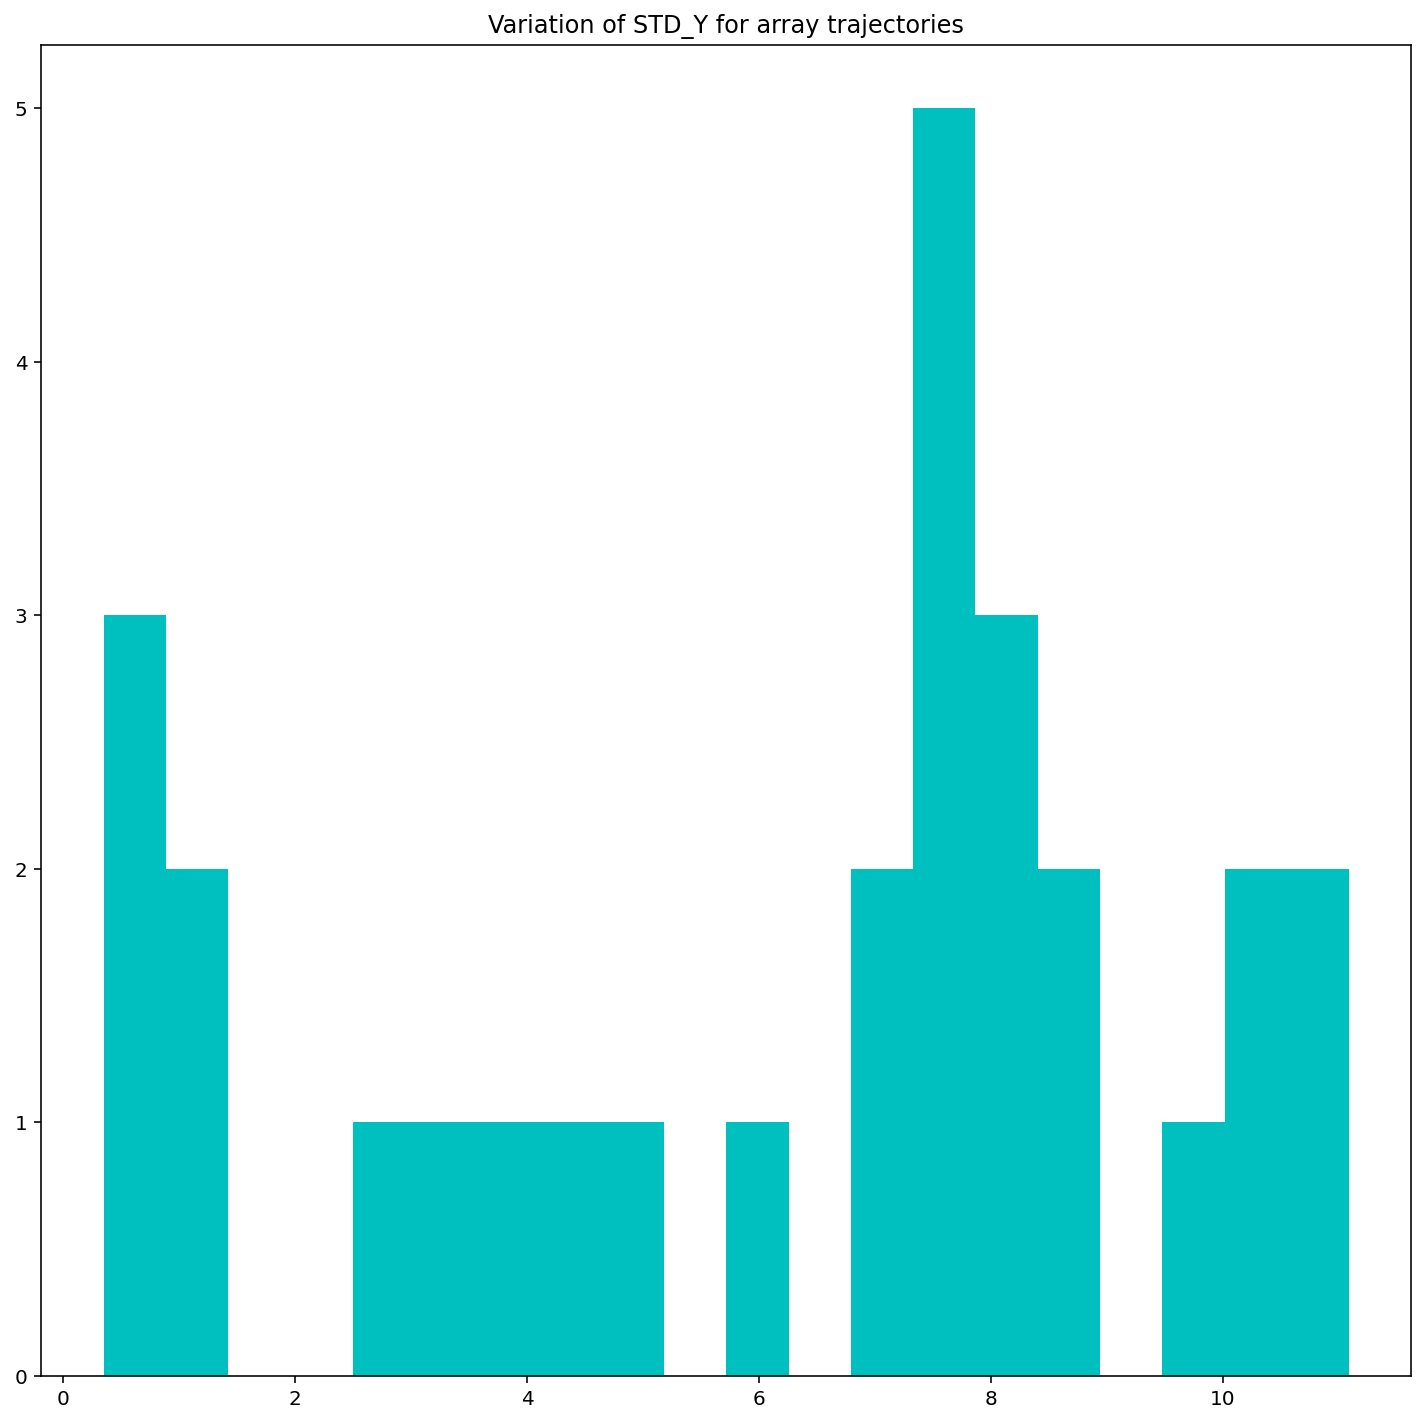

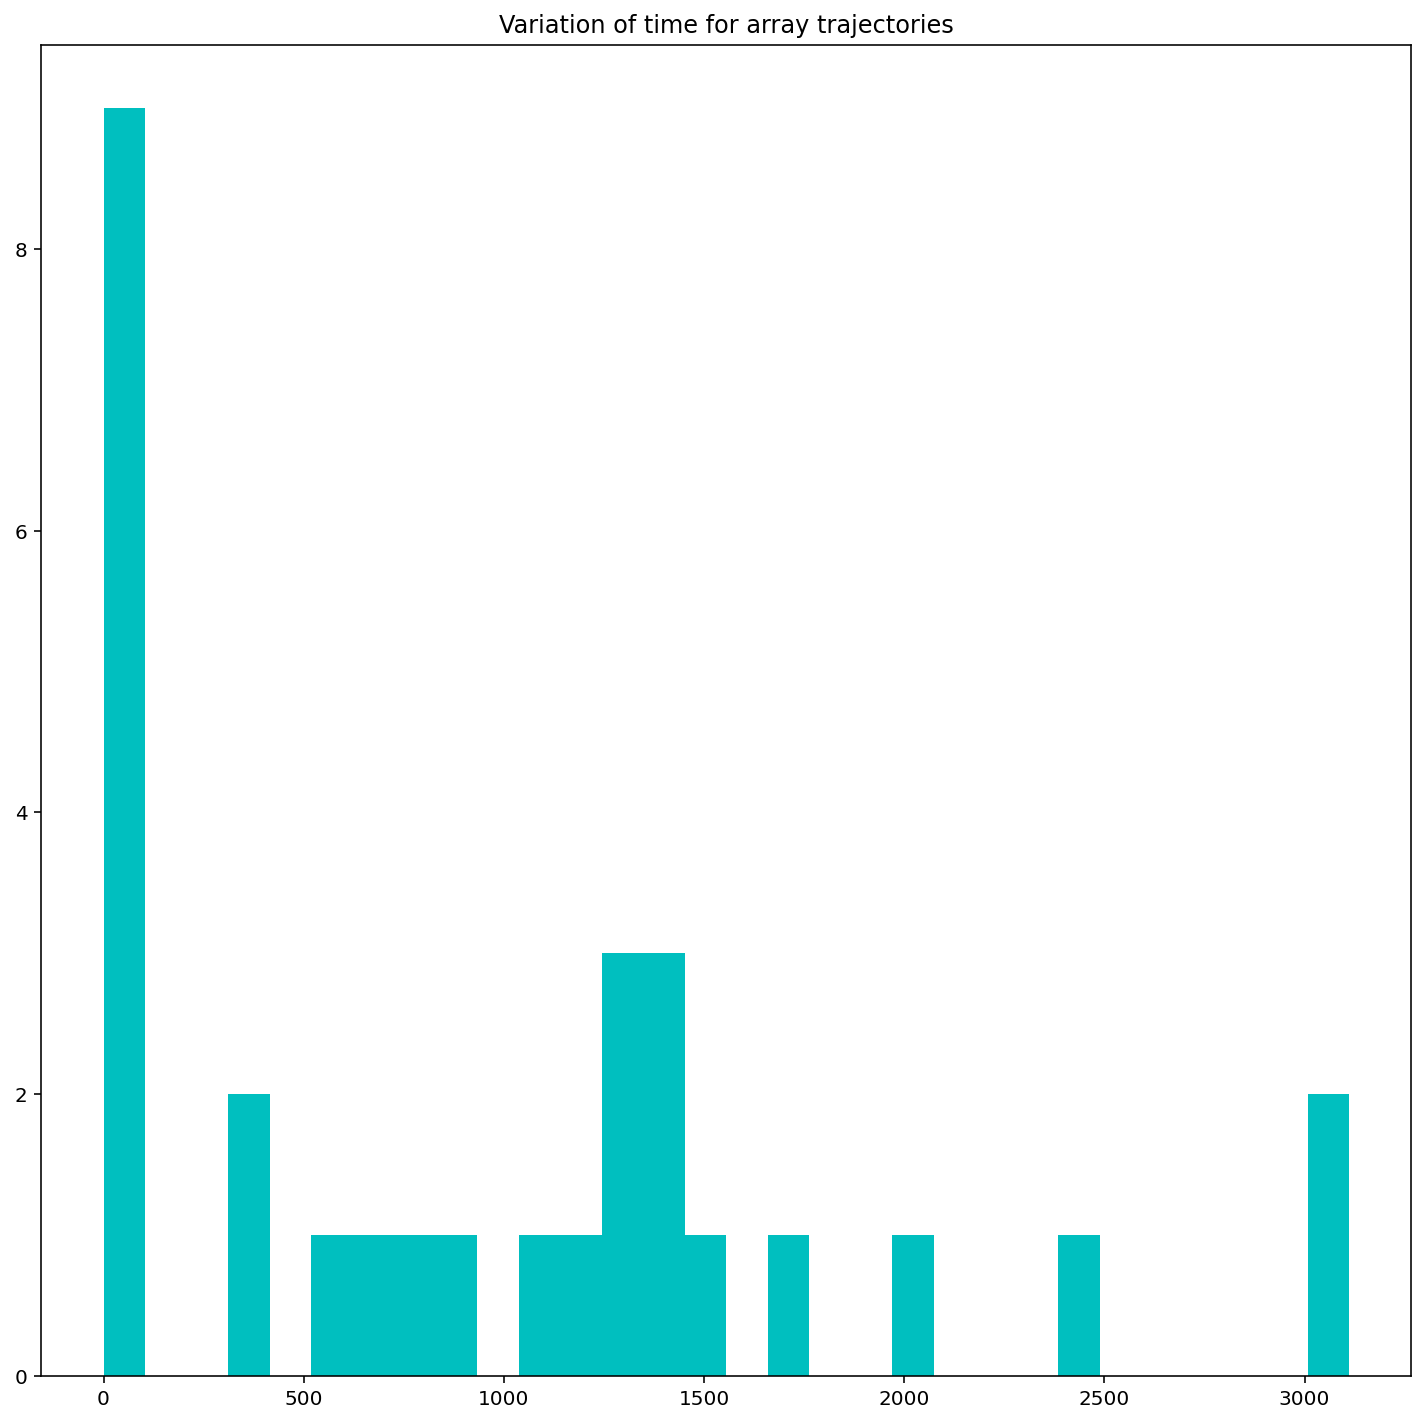

[  0.  103.7]


In [241]:
std_time_array = std_and_time(trajectories)
get_STDX = list(map(lambda array: array[0], std_time_array))
fig, ax = plt.subplots(figsize=(10, 10))
ax.set(title="Variation of STD_X for array trajectories")
(n, bins, patches) = ax.hist(get_STDX, bins =20, facecolor='c')
fig.tight_layout()
plt.show()

get_STDY = list(map(lambda array: array[1], std_time_array))
fig, ax = plt.subplots(figsize=(10, 10))
ax.set(title="Variation of STD_Y for array trajectories")
(n, bins, patches) = ax.hist(get_STDY, bins =20, facecolor='c')
fig.tight_layout()
plt.show()

get_time = list(map(lambda array: array[2], std_time_array))
fig, ax = plt.subplots(figsize=(10, 10))
ax.set(title="Variation of time for array trajectories")
(n, bins, patches) = ax.hist(get_time, bins =30, facecolor='c')
fig.tight_layout()
plt.show()
print(bins[0:2])

In [ ]:
#2,6,7,8,9,15,17,21,26

In [9]:
sub_data3 = sub_data.sort_values('time').reset_index(drop=True)
len(sub_data3)

1234224

In [10]:
sub_traj = find_trajectory(sub_data3)
len(sub_traj)

333

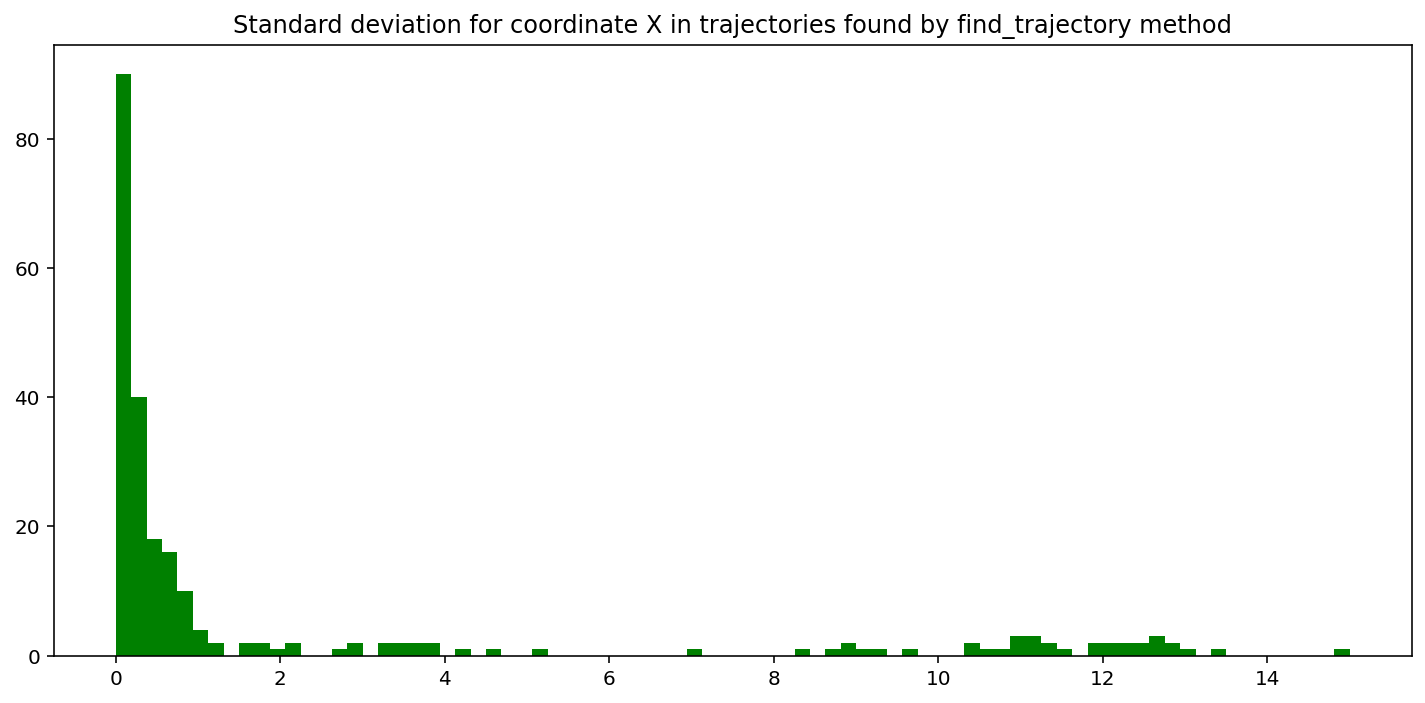

First three bins for X: [0.         0.18754166 0.37508333 0.56262499 0.75016665 0.93770832]
First three column number for X: [90. 40. 18. 16. 10.  4.]


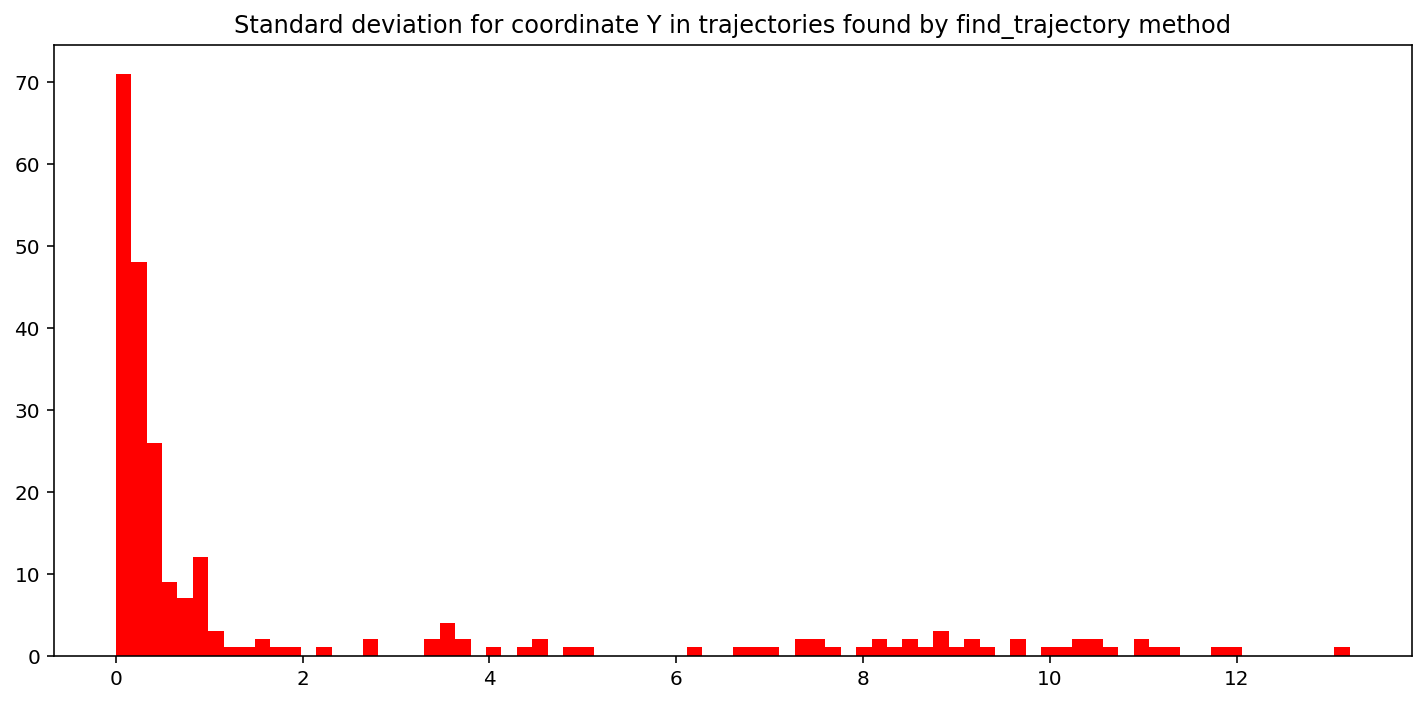

First three bins for Y: [0.         0.16517044 0.33034089 0.49551133 0.66068177 0.82585222
 0.99102266]
First three column number for X: [71. 48. 26.  9.  7. 12.  3.]


In [11]:
std_array_x = []
std_array_y = []
for idx, row in enumerate(sub_traj):
    std_x = row["x"].std()
    std_y = row["y"].std()
    std_array_x.append(std_x)
    std_array_y.append(std_y)

data_tuples = list(zip(std_array_x,std_array_y))    
stds = pd.DataFrame(data_tuples, columns=['std_x', 'std_y'])

fig, ax = plt.subplots(figsize=(10,5))
ax.set(title="Standard deviation for coordinate X in trajectories found by find_trajectory method")
(n, bins, patches) = ax.hist(stds['std_x'], bins =80, facecolor='g')
fig.tight_layout()
plt.show()
print(f"First three bins for X: {bins[0:6]}")
print(f"First three column number for X: {n[0:6]}")

fig, ax = plt.subplots(figsize=(10,5))
ax.set(title="Standard deviation for coordinate Y in trajectories found by find_trajectory method")
(n, bins, patches) = ax.hist(stds['std_y'],bins =80, facecolor='r')
fig.tight_layout()
plt.show()
print(f"First three bins for Y: {bins[0:7]}")
print(f"First three column number for X: {n[0:7]}")

In [12]:
clear_traj = remove_cluster_point(sub_traj, 0.375)
len(clear_traj)

91

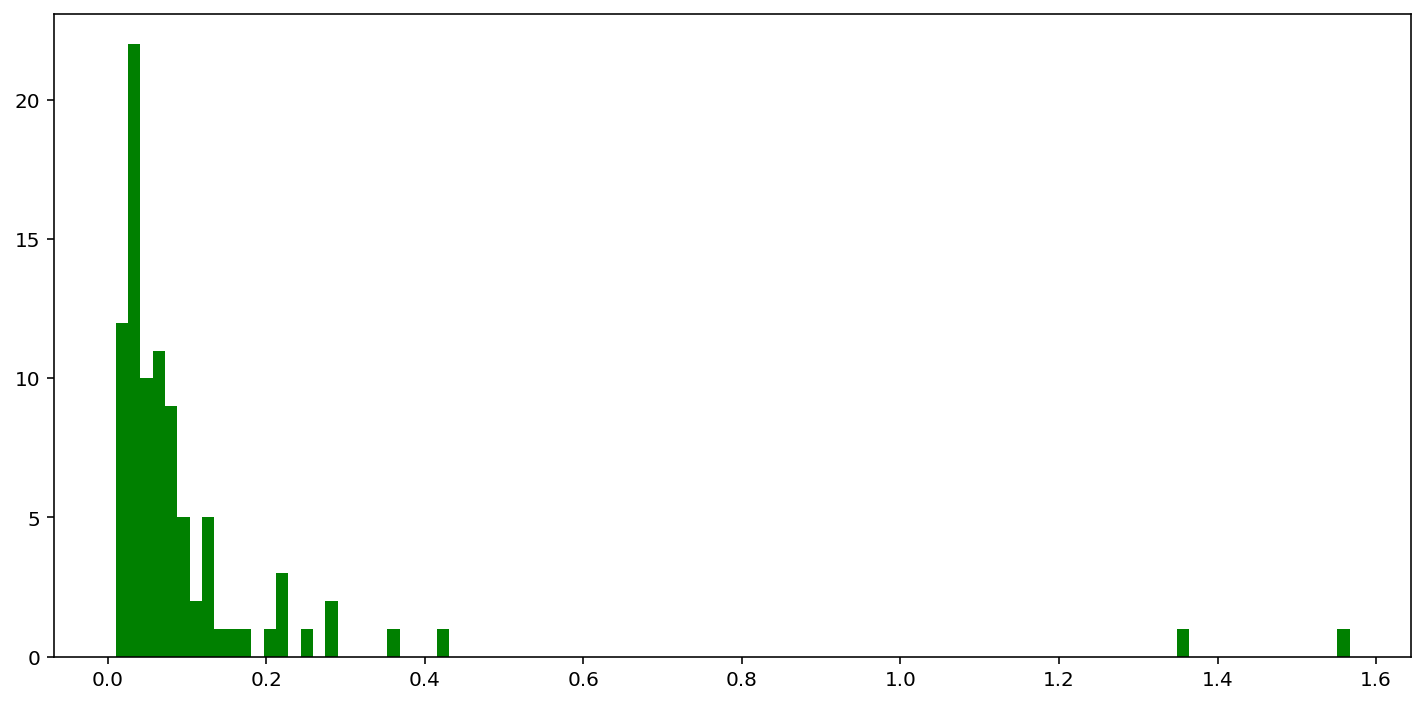

90
[0.01       0.02556684 0.04113369 0.05670053 0.07226738 0.08783422
 0.10340106 0.11896791 0.13453475 0.1501016  0.16566844 0.18123528
 0.19680213 0.21236897 0.22793582 0.24350266 0.2590695  0.27463635
 0.29020319 0.30577004 0.32133688 0.33690372 0.35247057 0.36803741
 0.38360426 0.3991711  0.41473794 0.43030479 0.44587163 0.46143848
 0.47700532 0.49257216 0.50813901 0.52370585 0.5392727  0.55483954
 0.57040638 0.58597323 0.60154007 0.61710691 0.63267376 0.6482406
 0.66380745 0.67937429 0.69494113 0.71050798 0.72607482 0.74164167
 0.75720851 0.77277535 0.7883422  0.80390904 0.81947589 0.83504273
 0.85060957 0.86617642 0.88174326 0.89731011 0.91287695 0.92844379
 0.94401064 0.95957748 0.97514433 0.99071117 1.00627801 1.02184486
 1.0374117  1.05297855 1.06854539 1.08411223 1.09967908 1.11524592
 1.13081277 1.14637961 1.16194645 1.1775133  1.19308014 1.20864699
 1.22421383 1.23978067 1.25534752 1.27091436 1.28648121 1.30204805
 1.31761489 1.33318174 1.34874858 1.36431543 1.37988227 1.39

In [13]:
distance_list = []
for i in range(0, len(clear_traj)-1):
    row = sub_data.iloc[i]
    row_next = sub_data.iloc[i+1]
    distance = euclidea(row["x"], row["y"], row_next["x"], row_next["y"])
    distance_list.append(distance)

fig, ax = plt.subplots(figsize=(10,5))
(n, bins, patches) =ax.hist(distance_list, facecolor='g', bins=100)
fig.tight_layout()
plt.show()
print(len(distance_list))
print(bins)
print(n)

In [14]:
start_time = time.time()
trajectories, waste = find_trajectory_3(sub_data3, 0.375, 0.026)
print(f"number of trajectories :{len(trajectories)}, number of wasted trajectories: {len(waste)}")
print("--- %s seconds ---" % (time.time() - start_time))

number of trajectories :91, number of wasted trajectories: 0
--- 637.3027529716492 seconds ---


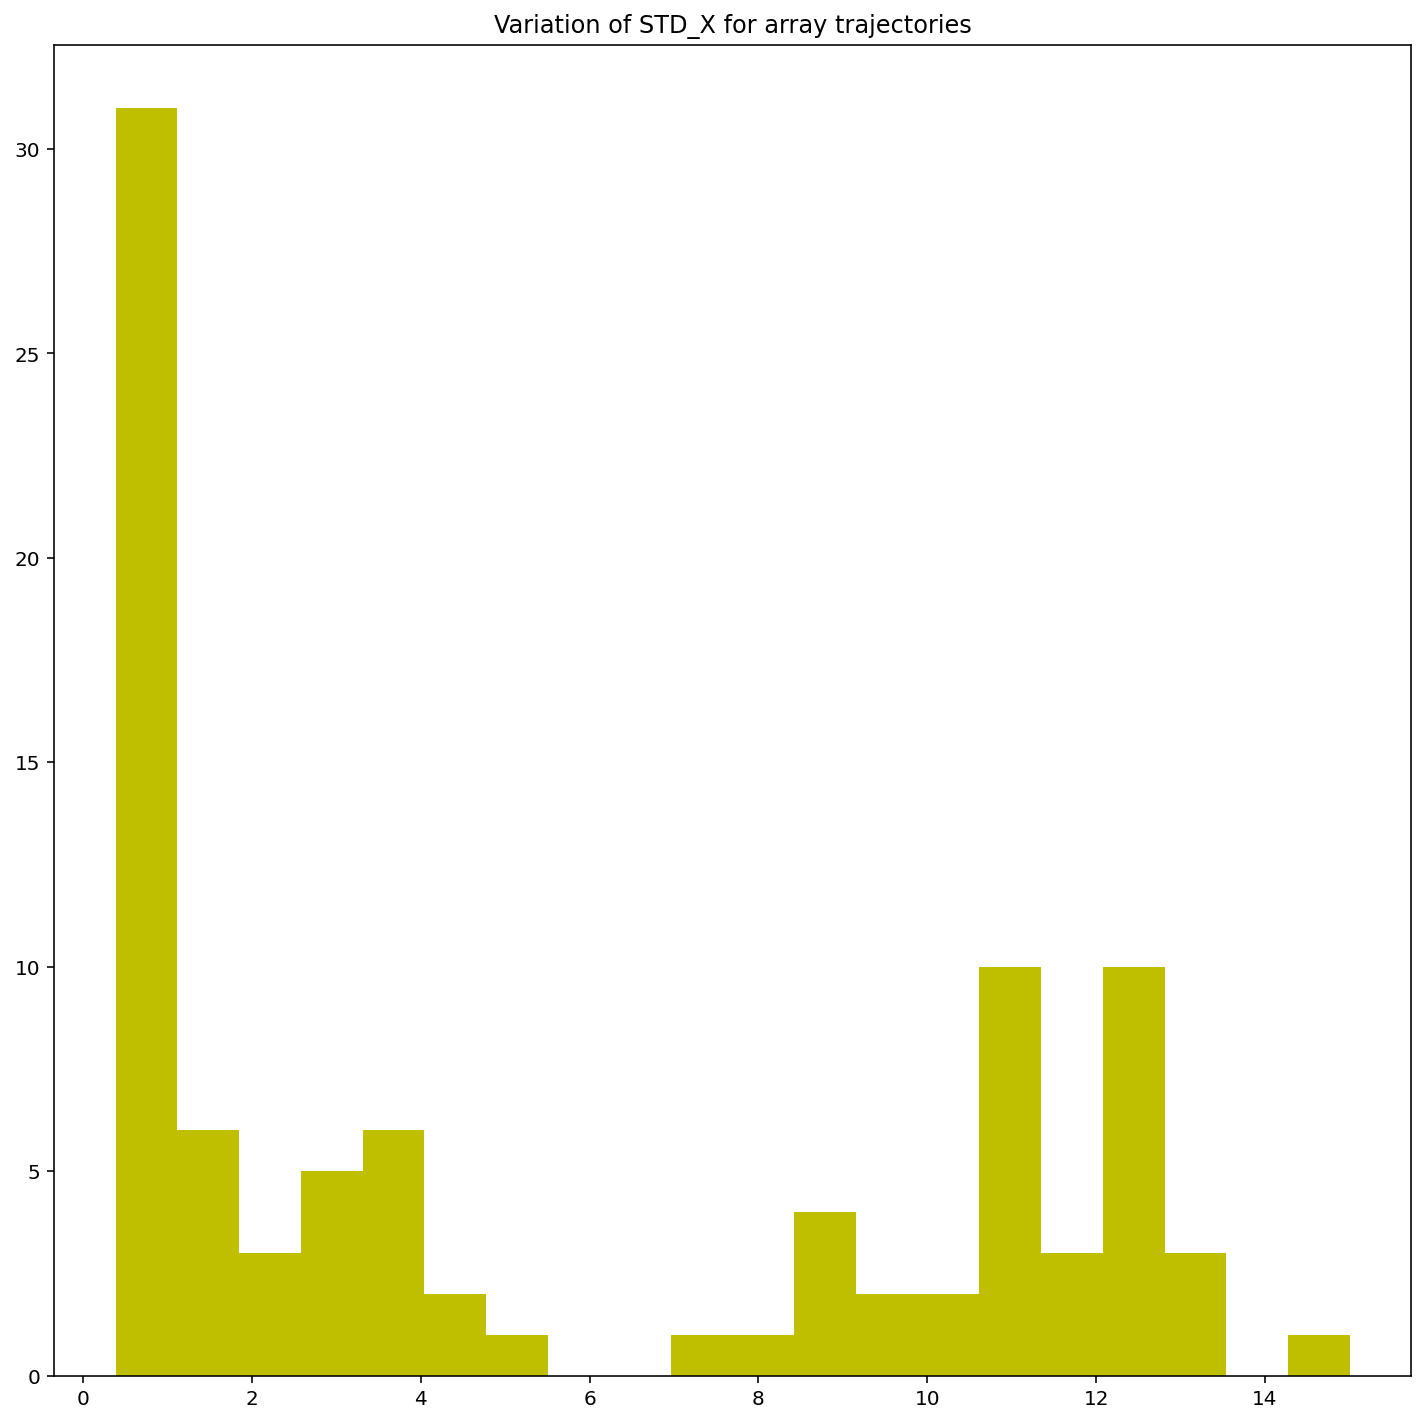

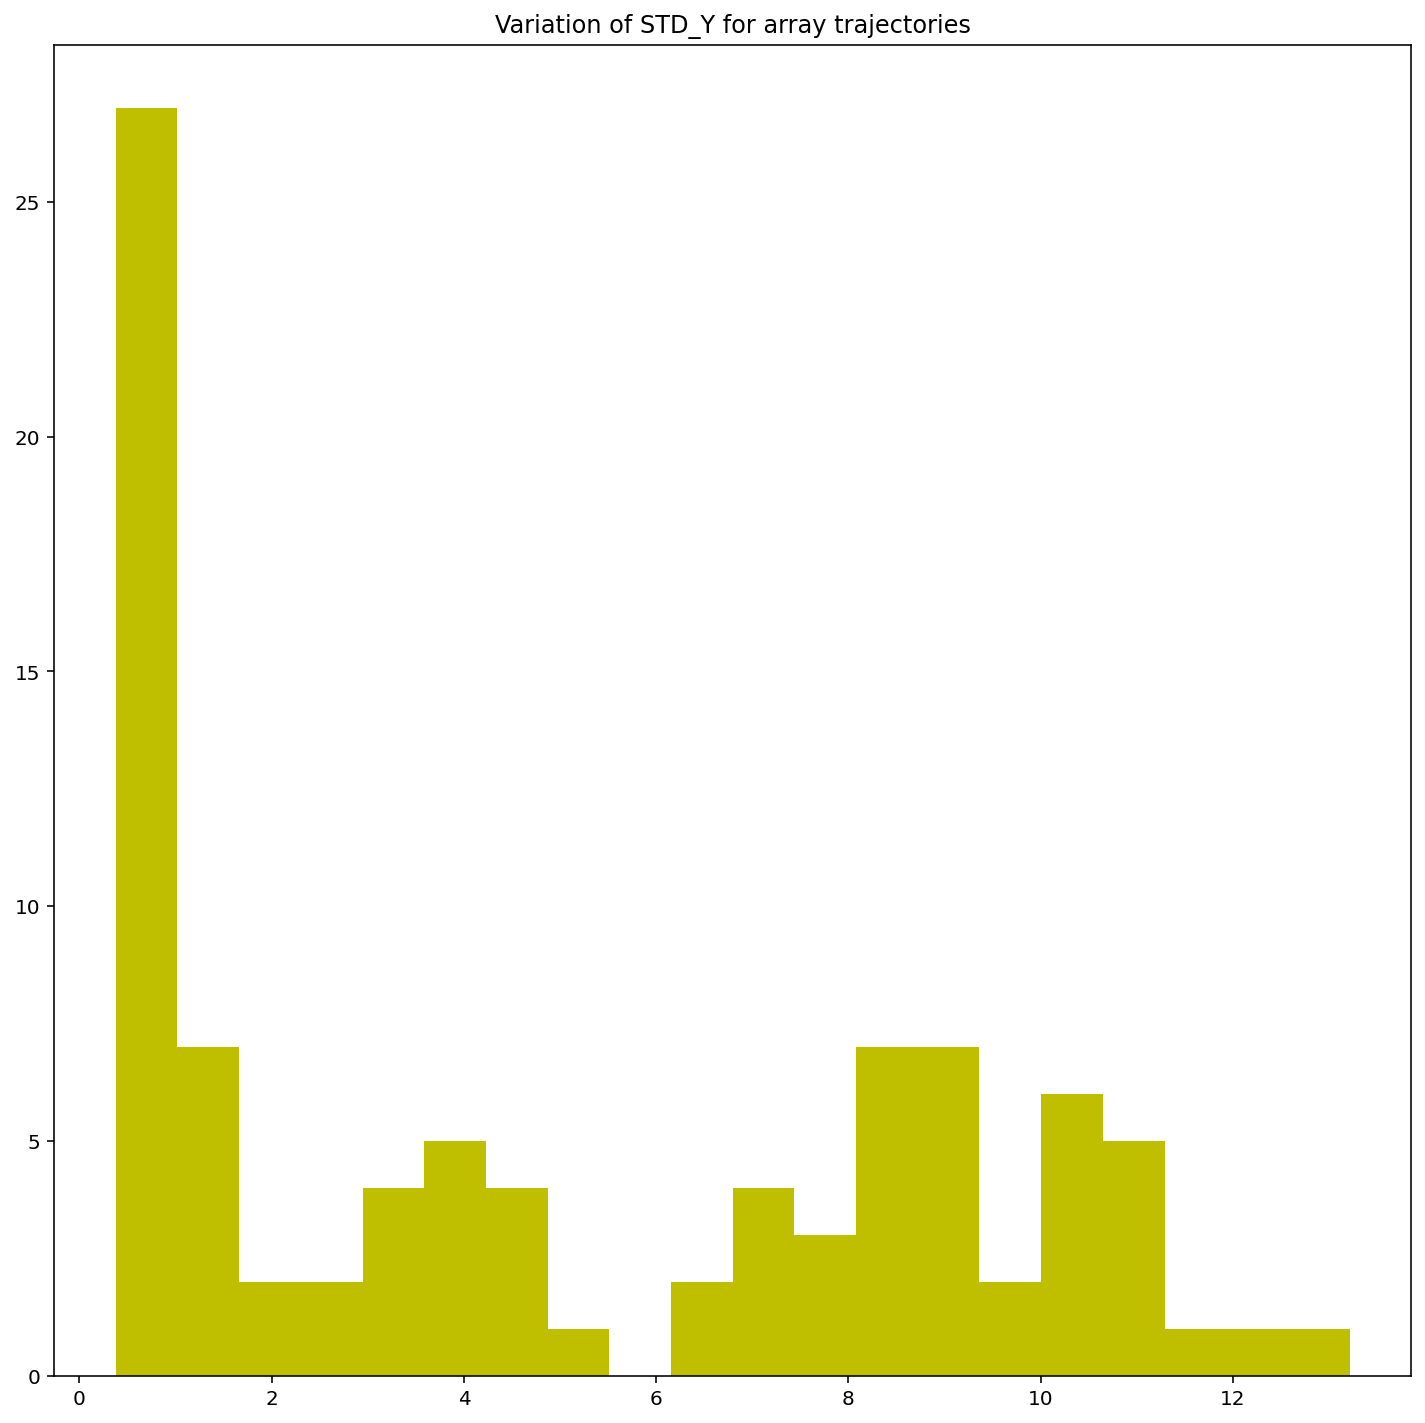

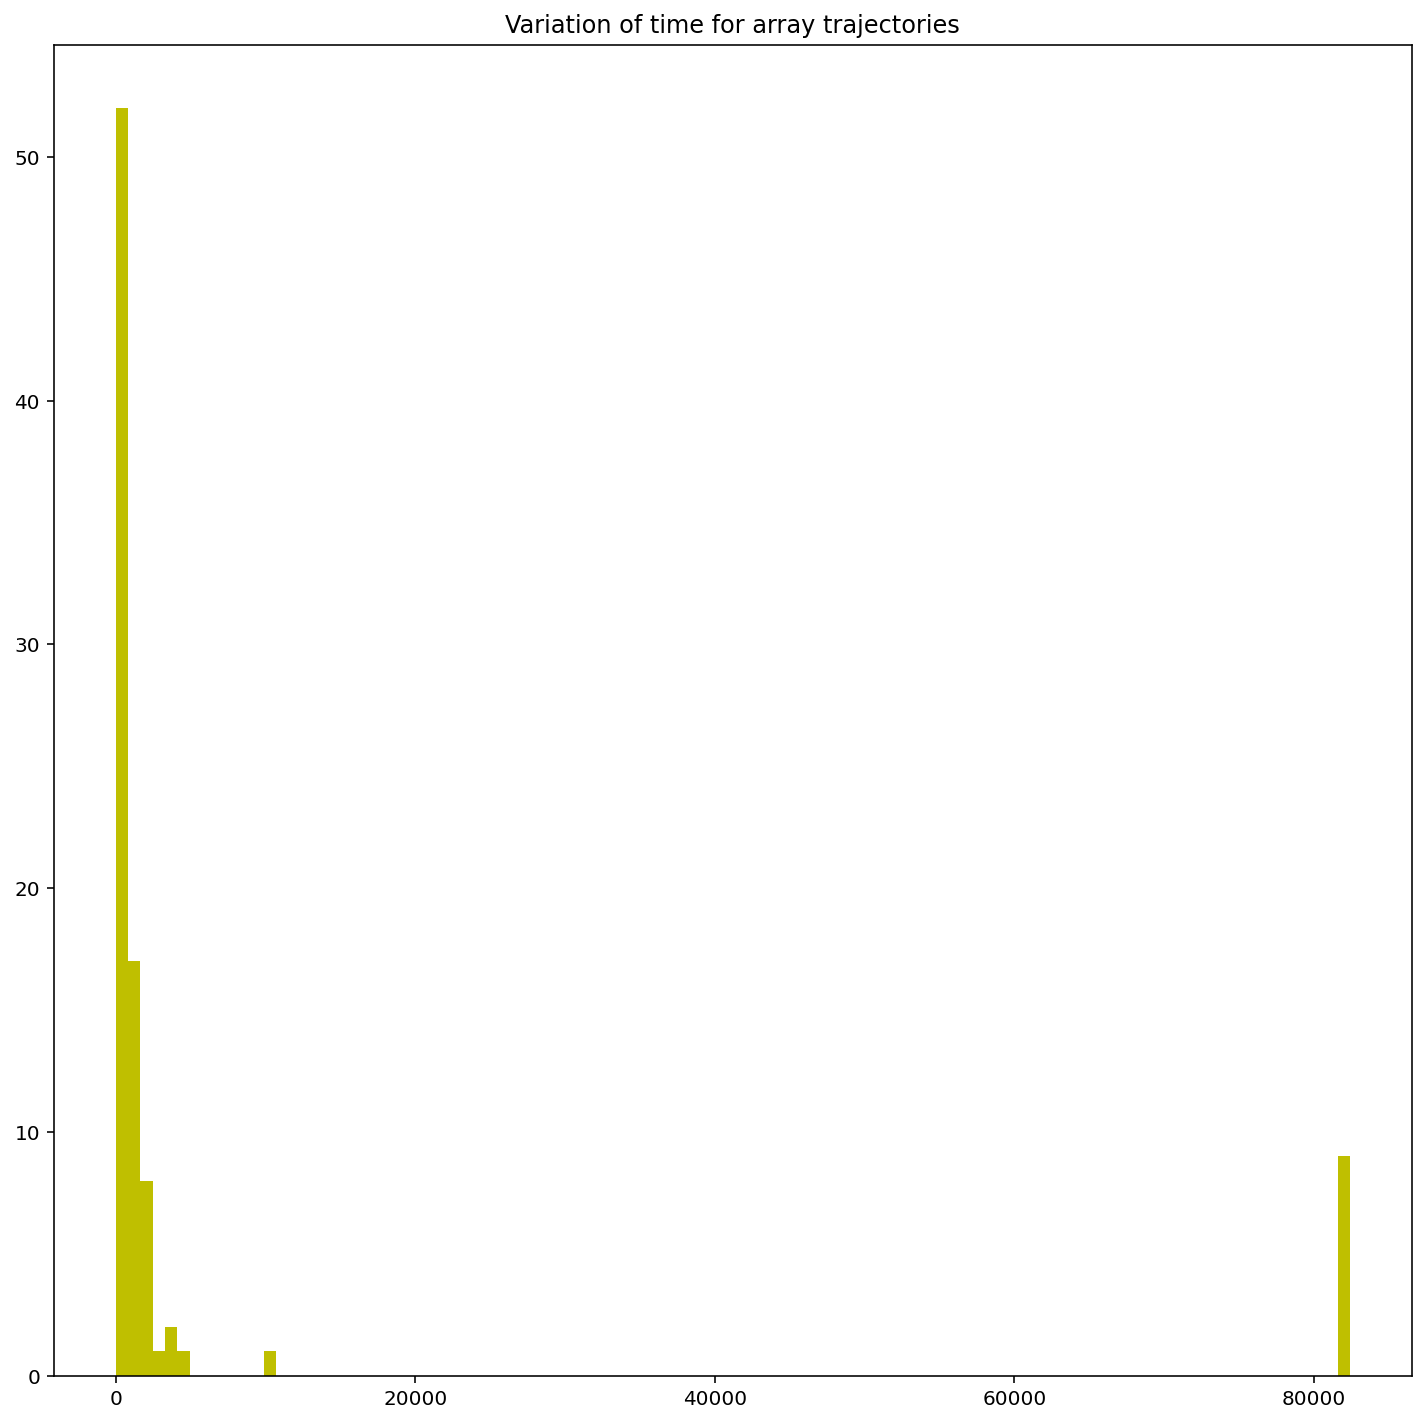

[  1. 825.]


In [15]:
std_time_array = std_and_time(trajectories)
get_STDX = list(map(lambda array: array[0], std_time_array))
fig, ax = plt.subplots(figsize=(10, 10))
ax.set(title="Variation of STD_X for array trajectories")
(n, bins, patches) = ax.hist(get_STDX, bins =20, facecolor='y')
fig.tight_layout()
plt.show()

get_STDY = list(map(lambda array: array[1], std_time_array))
fig, ax = plt.subplots(figsize=(10, 10))
ax.set(title="Variation of STD_Y for array trajectories")
(n, bins, patches) = ax.hist(get_STDY, bins =20, facecolor='y')
fig.tight_layout()
plt.show()

get_time = list(map(lambda array: array[2], std_time_array))
fig, ax = plt.subplots(figsize=(10, 10))
ax.set(title="Variation of time for array trajectories")
(n, bins, patches) = ax.hist(get_time, bins =100, facecolor='y')
fig.tight_layout()
plt.show()
print(bins[0:2])

In [18]:
i = 0

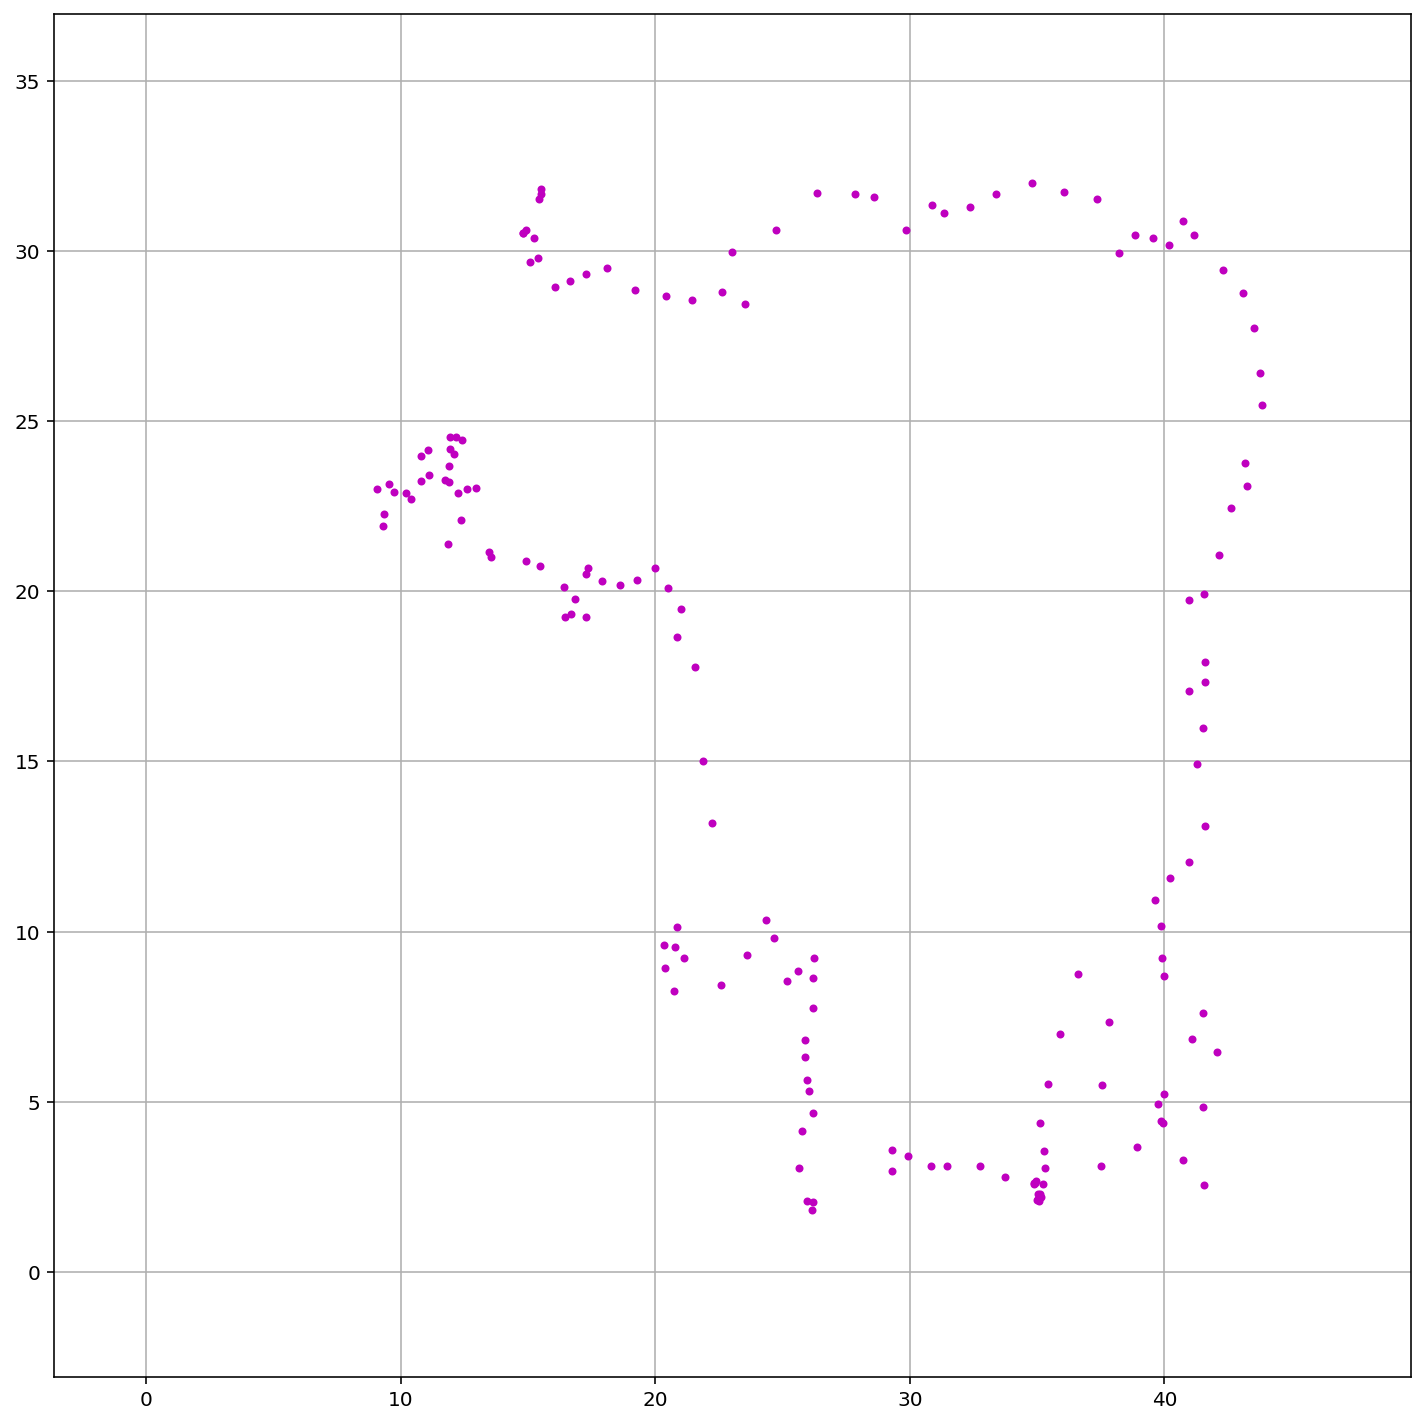

4


In [22]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(-3.63, 49.7)
ax.set_ylim(-3.08, 36.97)
ax.grid()
fig.tight_layout()

traj = trajectories[i]
#traj = clear_traj[4]
y = traj['y'].values
x = traj['x'].values
ax.plot(x, y, '.m')
plt.show()

#rint(traj)
i+=1
print(i)